In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import sklearn
import itertools
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_multi_train = pd.read_csv("y_multi_train.csv")
y_multi_test = pd.read_csv("y_multi_test.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
#dictionaries for final plots
res_log=dict()
res_rf_b=dict()
res_xgb_b=dict()
res_nn_b=dict()
res_tree=dict()
res_rf_m=dict()
res_xgb_m=dict()
res_nn_m=dict()

Noise range 0.5

In [ ]:
def modify_dataset(dataset, variables_to_poison, noise_factor):
    poisoned_dataset = dataset.copy()
    num_samples, num_variables = poisoned_dataset.shape
    for var_index in variables_to_poison:
        noise = np.random.normal(scale=noise_factor, size=num_samples)
        poisoned_dataset[:, var_index] += noise
    return poisoned_dataset

variables_to_poison = [2, 6, 8, 9, 11, 31, 33, 34, 39, 40]
noise1 = 1
X_train_mod1 = modify_dataset(X_train, variables_to_poison, noise1)

X_train_mod1

array([[ 1.79214449, -0.2082886 , -0.05701697, ..., -0.47506312,
        -0.73447607, -0.12070382],
       [-0.57638416,  1.78686151,  1.3891409 , ..., -1.07749554,
        -1.73937336, -0.12070382],
       [-1.0569863 , -0.20828827,  0.02590353, ...,  3.2904489 ,
         3.30201687, -0.12070382],
       ...,
       [-0.47187522, -0.06694436,  2.39135366, ..., -0.15729827,
        -1.36659372, -0.12070382],
       [-0.1666061 , -0.18783648, -1.04653667, ...,  1.07142868,
         2.04014546, -0.12070382],
       [-0.6757627 , -0.20011705, -0.68488861, ..., -0.72946225,
        -0.92926595, -0.12070382]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8946699910617679
score on train: 0.8940103110699184
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     30772
           1       0.88      0.97      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.91      0.87      0.88     85028
weighted avg       0.90      0.89      0.89     85028



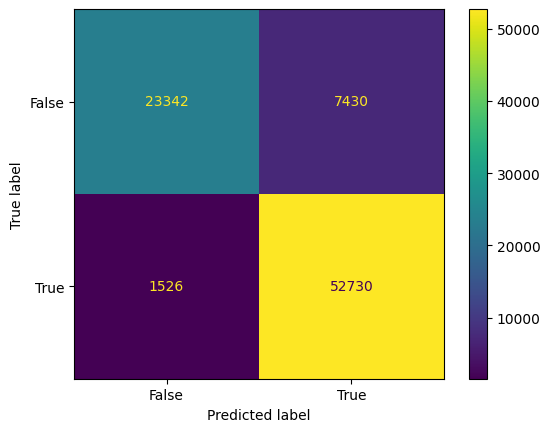

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod1, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod1, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['1']=acc

AUC: 0.9581


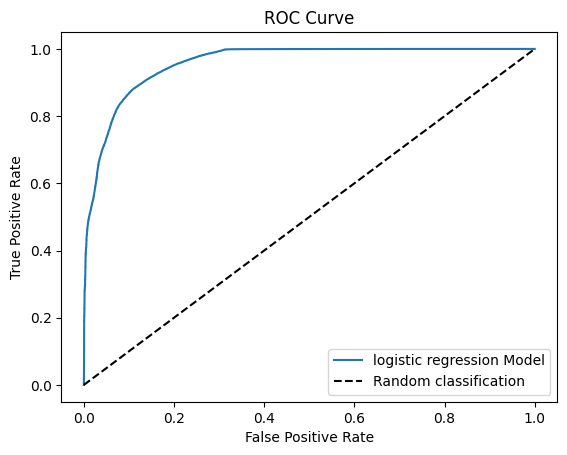

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-8-68bbbc7f51d8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod1, y_train)


score on test: 0.9373030060685892
score on train: 0.9538956148989167
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     30772
           1       0.96      0.94      0.95     54256

    accuracy                           0.94     85028
   macro avg       0.93      0.94      0.93     85028
weighted avg       0.94      0.94      0.94     85028



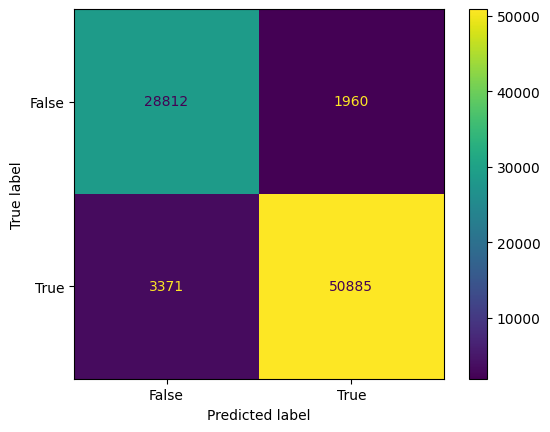

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod1, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod1, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['1']=acc

AUC: 0.9724


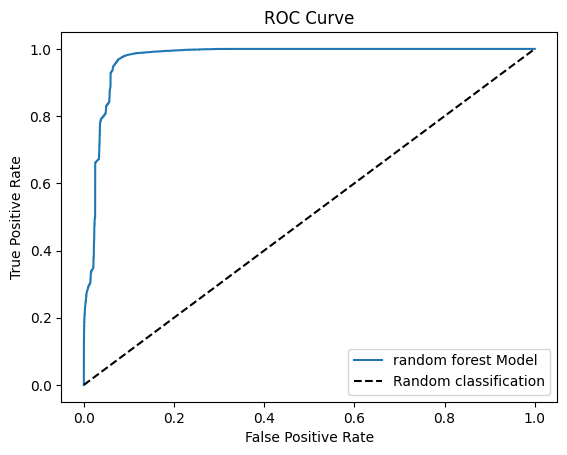

In [ ]:
# ROC curve and AUC
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.971915133838265
score on train: 0.9921508428430748
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30772
           1       0.98      0.98      0.98     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



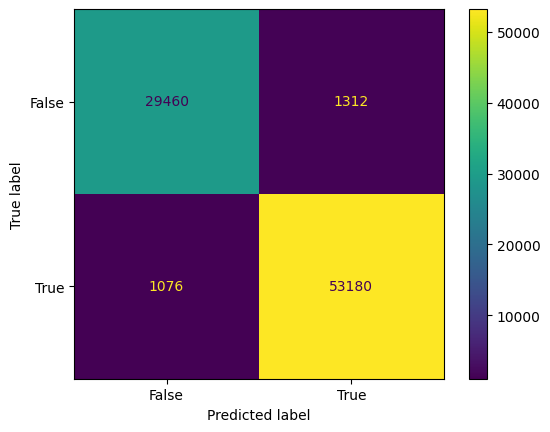

In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod1, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod1, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['1']=acc

AUC: 0.9966


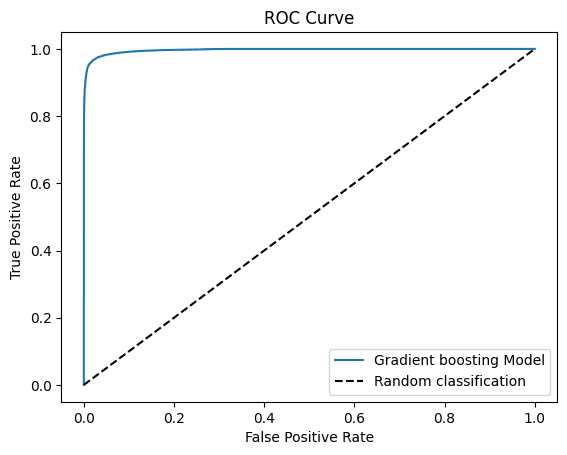

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.2019 - accuracy: 0.9074 - f1_m: 0.9293 - precision_m: 0.9087 - recall_m: 0.9526
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1579 - accuracy: 0.9273 - f1_m: 0.9433 - precision_m: 0.9363 - recall_m: 0.9514
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1401 - accuracy: 0.9359 - f1_m: 0.9497 - precision_m: 0.9486 - recall_m: 0.9516
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1240 - accuracy: 0.9453 - f1_m: 0.9570 - precision_m: 0.9569 - recall_m: 0.9578
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1021 - accuracy: 0.9572 - f1_m: 0.9664 - precision_m: 0.9663 - recall_m: 0.9670
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.9616 - f1_m: 0.9698 - precision_m: 0.9701 - recall_m: 0.9700
Epoch 7/100
1349/1349 [=======================

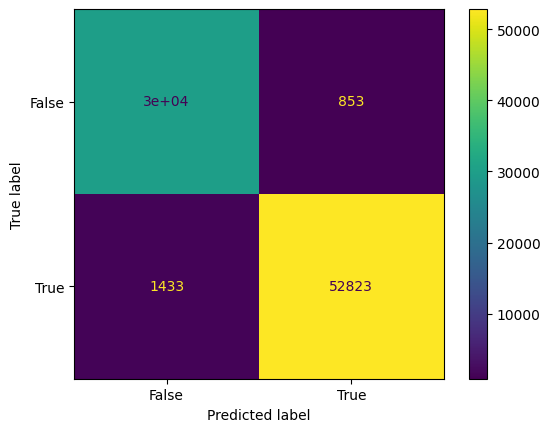

In [ ]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod1, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod1,y_train)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['1']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

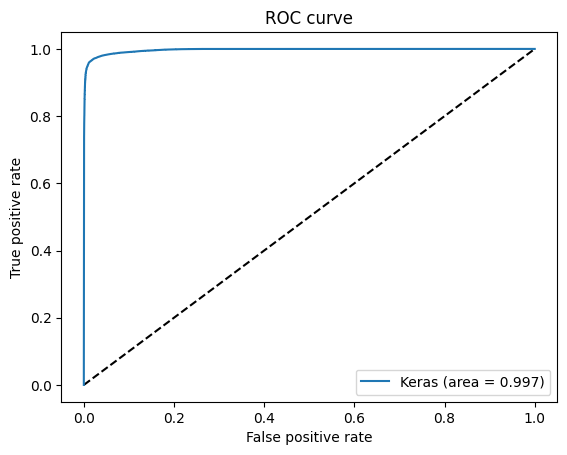

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
attack_cat=['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

score on test: 0.8079338570823729
score on train: 0.8272200660371893
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     30772
           1       0.97      0.97      0.97     19423
           2       0.60      0.84      0.70     14709
           3       0.68      0.59      0.63      7921
           4       0.40      0.13      0.20      5357
           5       0.70      0.72      0.71      4578
           6       0.69      0.02      0.05       909
           7       0.16      0.02      0.03       780
           8       0.00      0.00      0.00       513
           9       1.00      0.06      0.11        66

    accuracy                           0.81     85028
   macro avg       0.61      0.43      0.43     85028
weighted avg       0.79      0.81      0.79     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


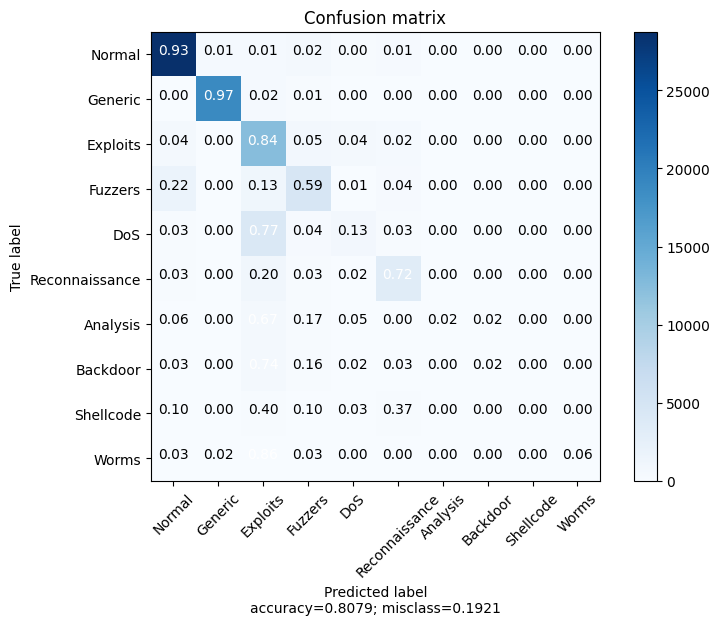

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod1, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod1, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['1']=acc

In [ ]:
import yellowbrick
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization
    visualizer = ROCAUC(model)
    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer

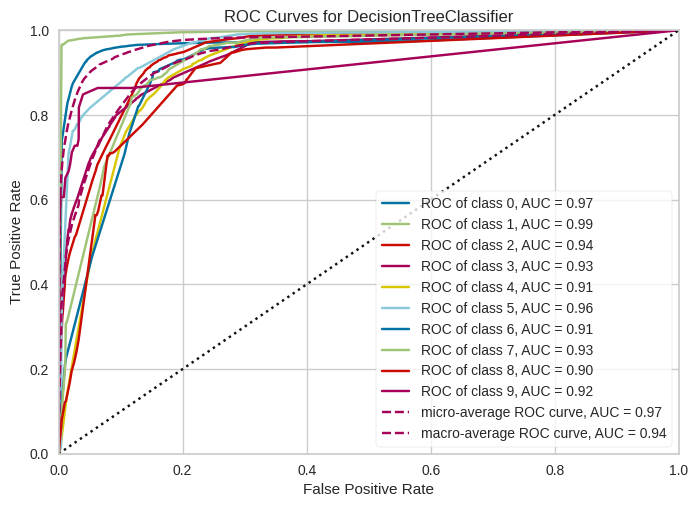

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train_mod1, y_multi_train, X_test, y_multi_test)

<ipython-input-19-7521fd7bd576>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod1, y_multi_train)


score on test: 0.7417203744648821
score on train: 0.8156983143138504
              precision    recall  f1-score   support

           0       0.64      0.97      0.77     30772
           1       1.00      0.94      0.97     19423
           2       0.73      0.61      0.67     14709
           3       0.75      0.43      0.55      7921
           4       0.62      0.01      0.02      5357
           5       0.88      0.52      0.65      4578
           6       1.00      0.00      0.01       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.74     85028
   macro avg       0.56      0.35      0.36     85028
weighted avg       0.75      0.74      0.70     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


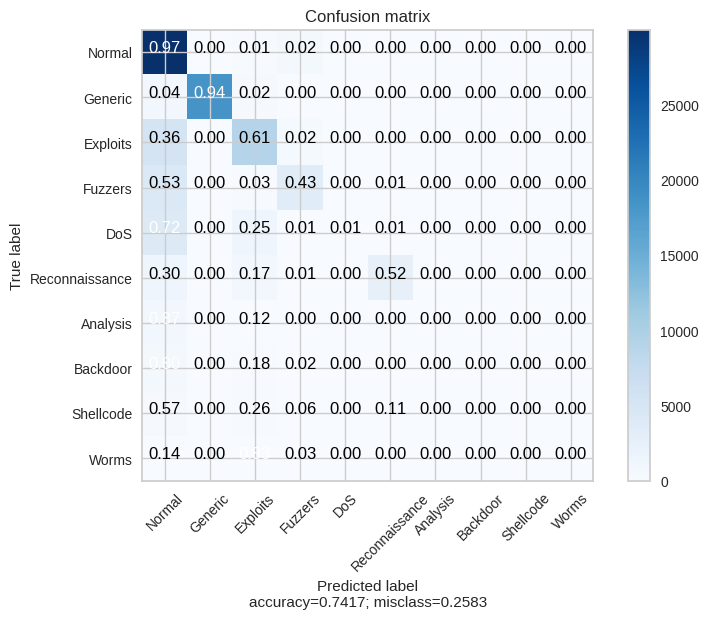

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod1, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod1, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['1']=acc

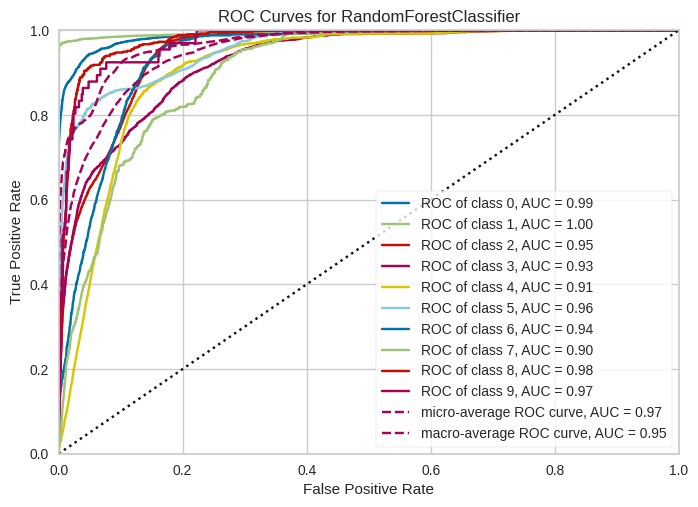

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train_mod1, y_multi_train, X_test, y_multi_test)

score on test: 0.8551183139671638
score on train: 0.9077854370619244
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30772
           1       1.00      0.98      0.99     19423
           2       0.67      0.80      0.73     14709
           3       0.80      0.77      0.79      7921
           4       0.41      0.38      0.39      5357
           5       0.91      0.76      0.83      4578
           6       0.67      0.09      0.17       909
           7       0.57      0.08      0.14       780
           8       0.74      0.34      0.47       513
           9       0.71      0.26      0.38        66

    accuracy                           0.86     85028
   macro avg       0.74      0.54      0.58     85028
weighted avg       0.86      0.86      0.85     85028



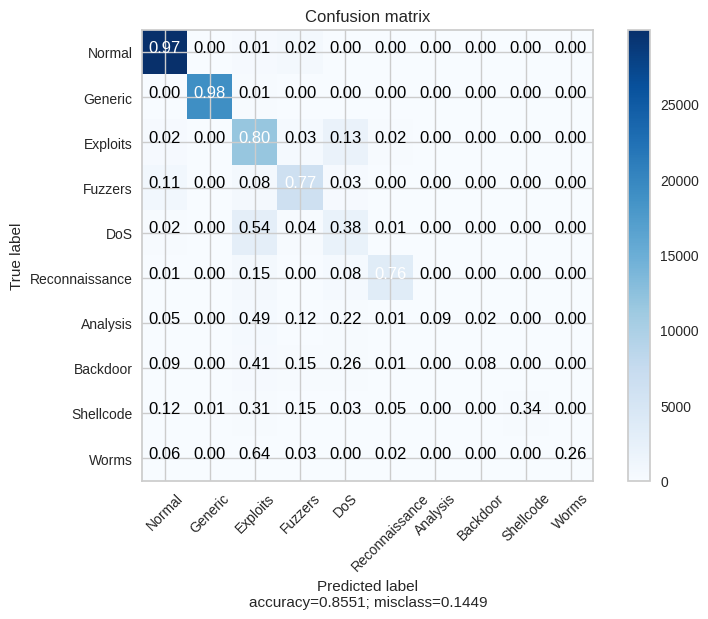

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod1, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod1, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['1']=acc

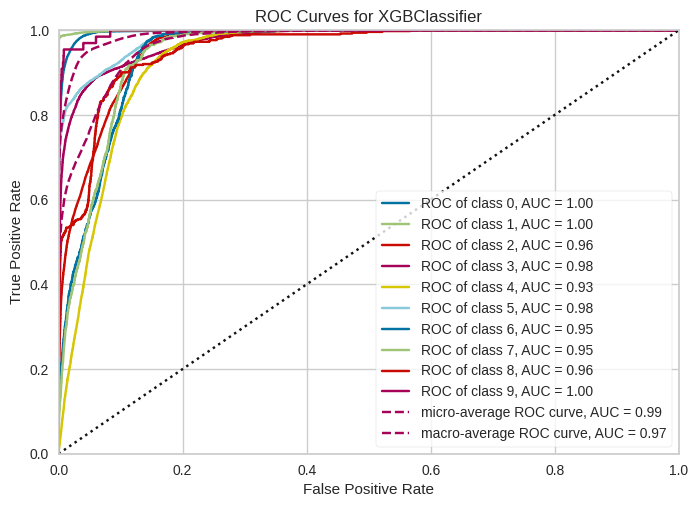

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train_mod1, y_multi_train, X_test, y_multi_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.7637 - accuracy: 0.7211 - f1_m: 1.6319 - precision_m: 6471460.5000 - recall_m: 1.6575
Epoch 2/100
1349/

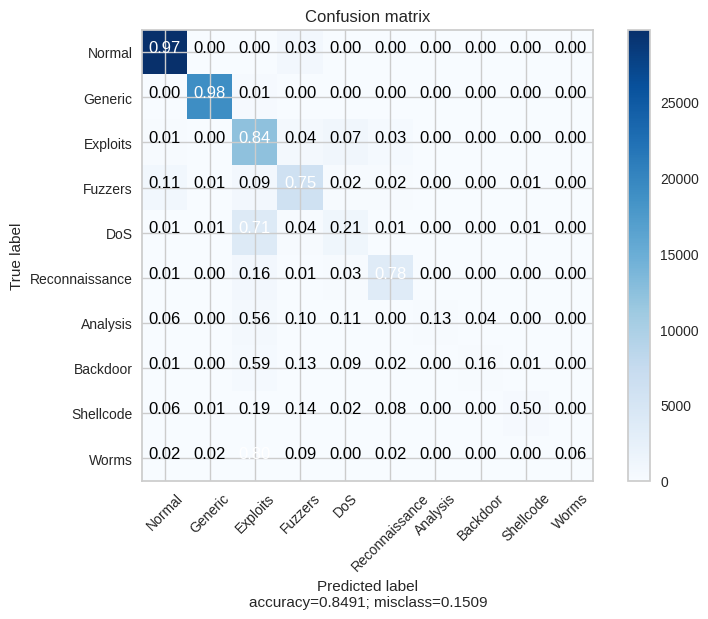

In [ ]:
from keras import metrics
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod1,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod1,y_multi_train)[1]))
scores = model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['1']=scores[1]
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.7597874611698036


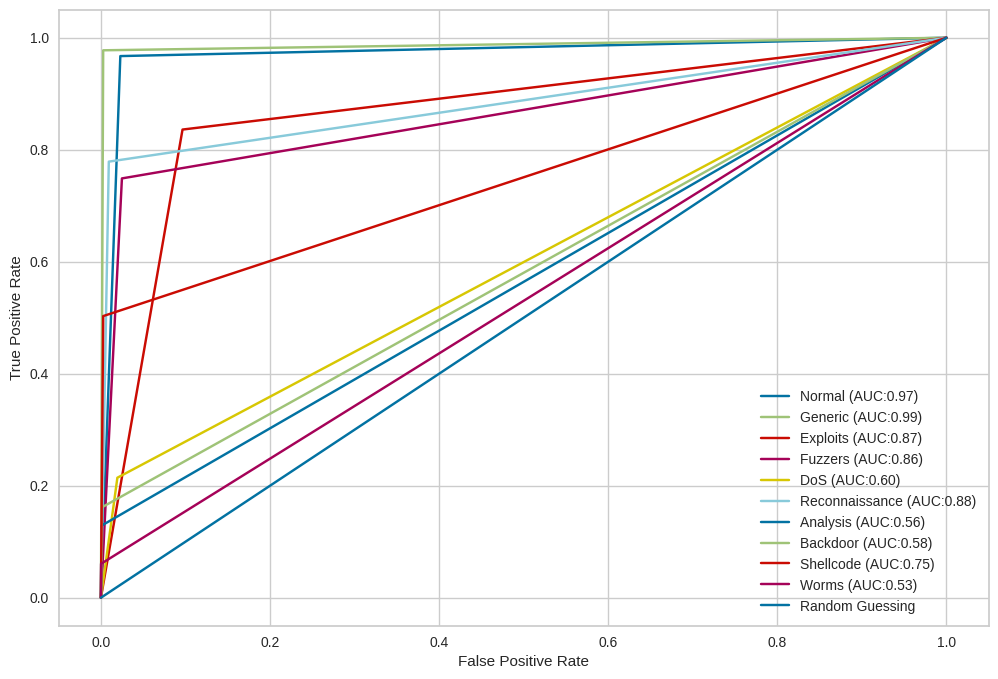

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
from sklearn.preprocessing import LabelBinarizer

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(attack_cat):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 1

In [ ]:
noise2 = 2
X_train_mod2 = modify_dataset(X_train, variables_to_poison, noise2)

X_train_mod2

array([[ 1.79214449, -0.2082886 , -3.05107026, ...,  1.45449919,
        -1.42868768, -0.12070382],
       [-0.57638416,  1.78686151,  0.96697031, ..., -1.80676416,
        -1.94982839, -0.12070382],
       [-1.0569863 , -0.20828827, -3.08962164, ...,  1.63067824,
         6.19664455, -0.12070382],
       ...,
       [-0.47187522, -0.06694436, -3.69772927, ..., -1.34439782,
        -0.73376123, -0.12070382],
       [-0.1666061 , -0.18783648,  0.39679066, ...,  2.3451629 ,
        -0.88685302, -0.12070382],
       [-0.6757627 , -0.20011705,  0.5396698 , ..., -1.54171135,
        -0.79964479, -0.12070382]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.891776826457167
score on train: 0.8915483983085211
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     30772
           1       0.87      0.97      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



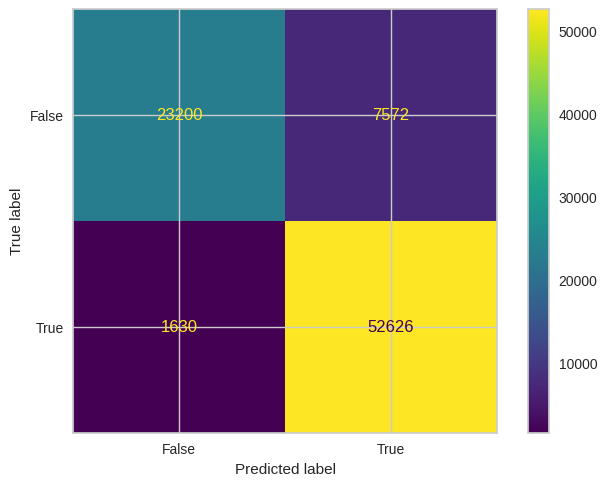

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod2, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod2, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['2']=acc

AUC: 0.9547


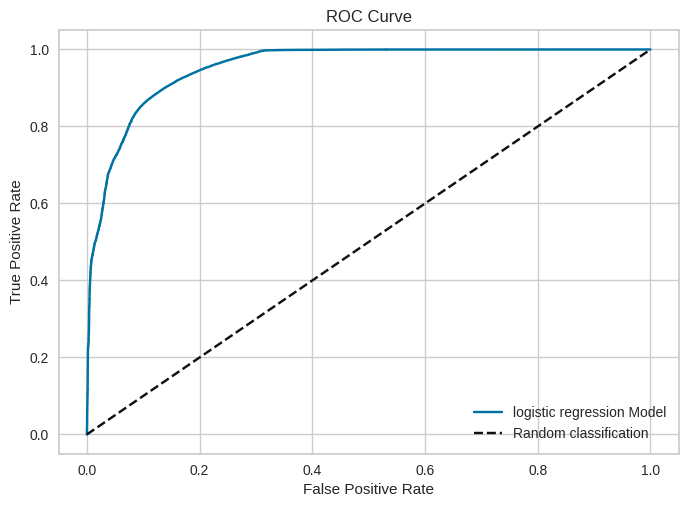

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-28-7c4992ce0511>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod2, y_train)


score on test: 0.9503222467892929
score on train: 0.9509818687366043
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     30772
           1       0.95      0.97      0.96     54256

    accuracy                           0.95     85028
   macro avg       0.95      0.94      0.95     85028
weighted avg       0.95      0.95      0.95     85028



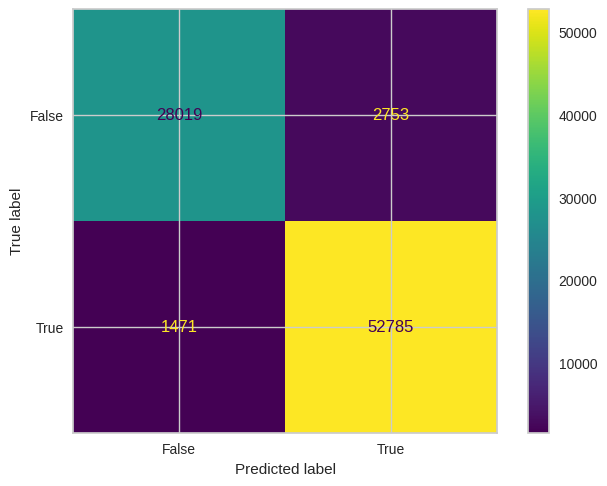

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod2, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod2, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['2']=acc

AUC: 0.9876


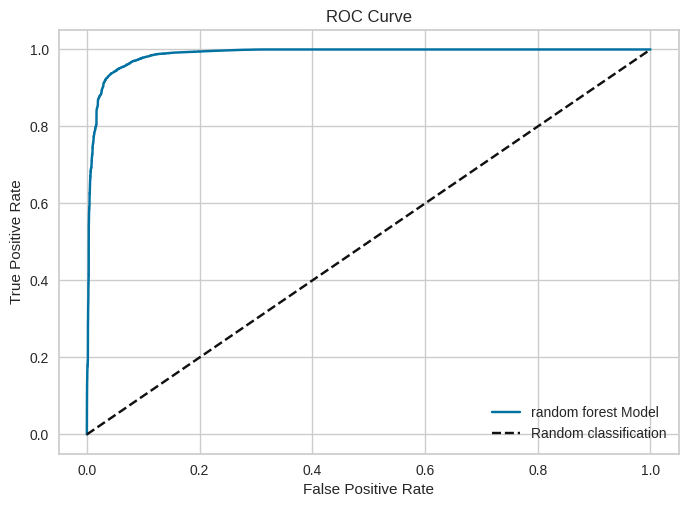

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9686926659453357
score on train: 0.9923420031280774
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30772
           1       0.97      0.98      0.98     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



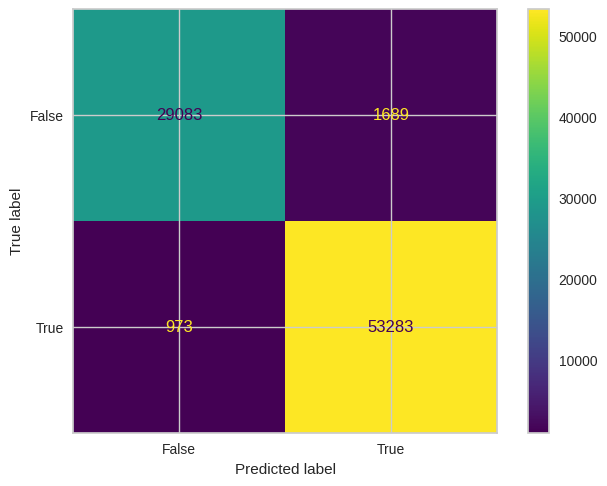

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod2, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod2, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['2']=acc

AUC: 0.9960


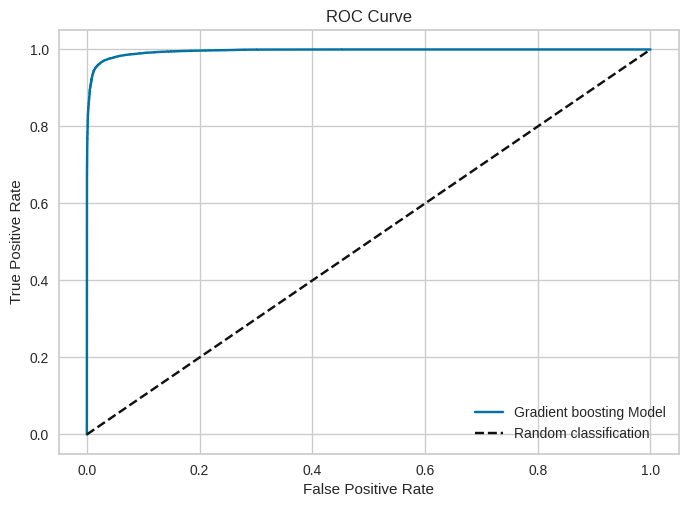

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2267 - accuracy: 0.8973 - f1_m: 0.9220 - precision_m: 0.8944 - recall_m: 0.9531
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1778 - accuracy: 0.9187 - f1_m: 0.9370 - precision_m: 0.9247 - recall_m: 0.9506
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1558 - accuracy: 0.9280 - f1_m: 0.9437 - precision_m: 0.9375 - recall_m: 0.9508
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1423 - accuracy: 0.9350 - f1_m: 0.9489 - precision_m: 0.9475 - recall_m: 0.9512
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1309 - accuracy: 0.9407 - f1_m: 0.9534 - precision_m: 0.9533 - recall_m: 0.9543
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1121 - accuracy: 0.9512 - f1_m: 0.9616 - precision_m: 0.9615 - recall_m: 0.9623
Epoch 7/100
1349/1349 [=======================

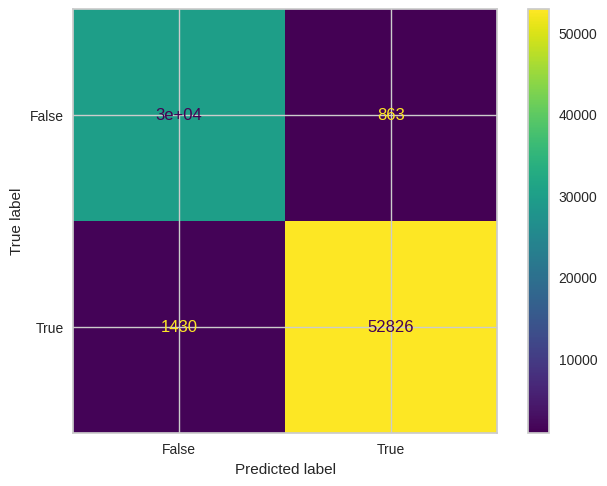

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod2, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod2,y_train)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['2']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

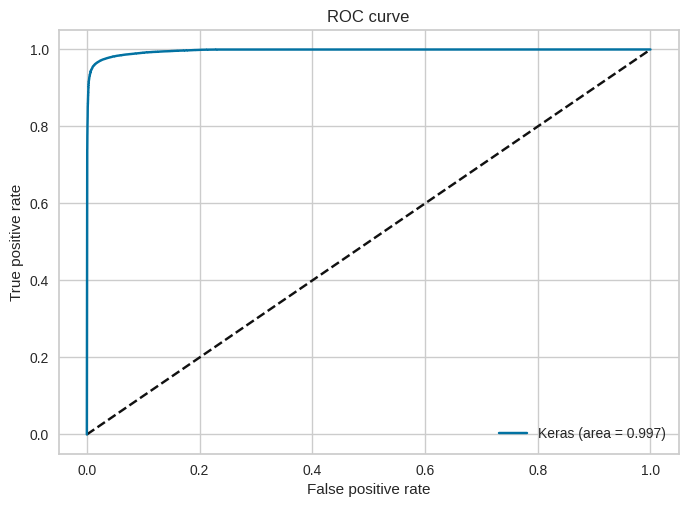

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.8045114550501011
score on train: 0.8270752476394602
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     30772
           1       0.96      0.96      0.96     19423
           2       0.60      0.82      0.69     14709
           3       0.68      0.59      0.63      7921
           4       0.42      0.15      0.22      5357
           5       0.72      0.72      0.72      4578
           6       0.65      0.02      0.04       909
           7       0.16      0.02      0.03       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.80     85028
   macro avg       0.51      0.42      0.42     85028
weighted avg       0.79      0.80      0.78     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


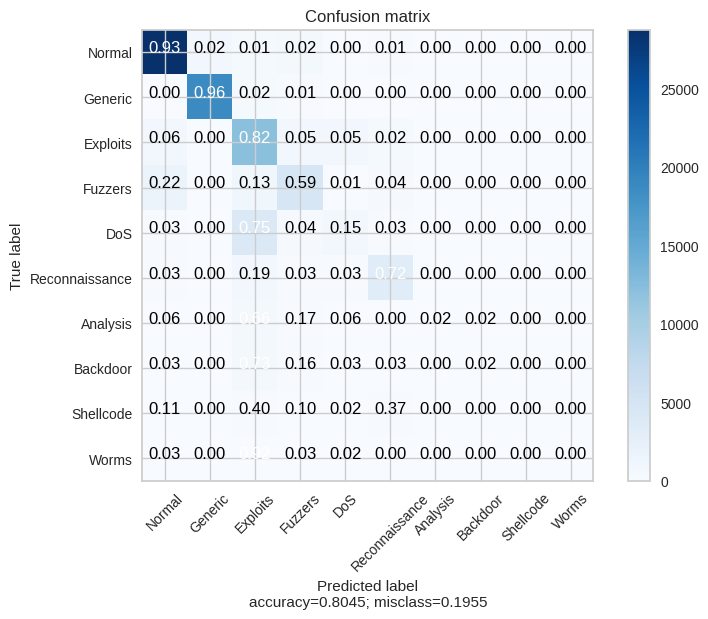

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod2, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod2, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['2']=acc

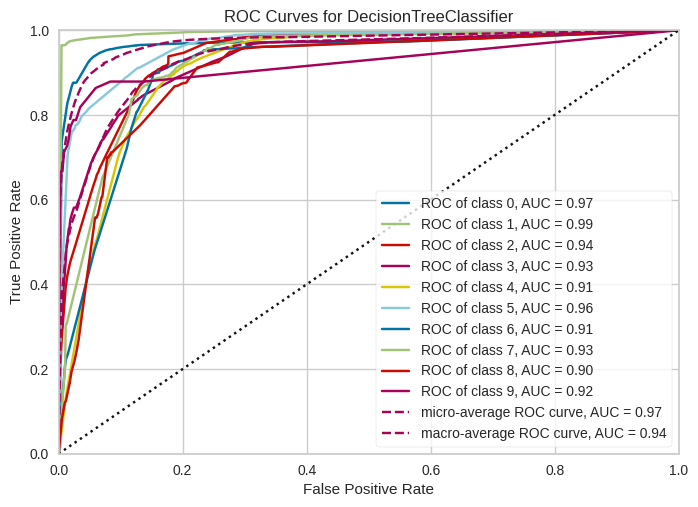

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train_mod2, y_multi_train, X_test, y_multi_test)

<ipython-input-36-63dc6513c11b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod2, y_multi_train)


score on test: 0.7980900409276944
score on train: 0.815958987429763
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     30772
           1       1.00      0.97      0.98     19423
           2       0.57      0.89      0.69     14709
           3       0.75      0.44      0.55      7921
           4       0.45      0.01      0.03      5357
           5       0.90      0.63      0.74      4578
           6       0.00      0.00      0.00       909
           7       1.00      0.00      0.01       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.80     85028
   macro avg       0.55      0.39      0.39     85028
weighted avg       0.79      0.80      0.76     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


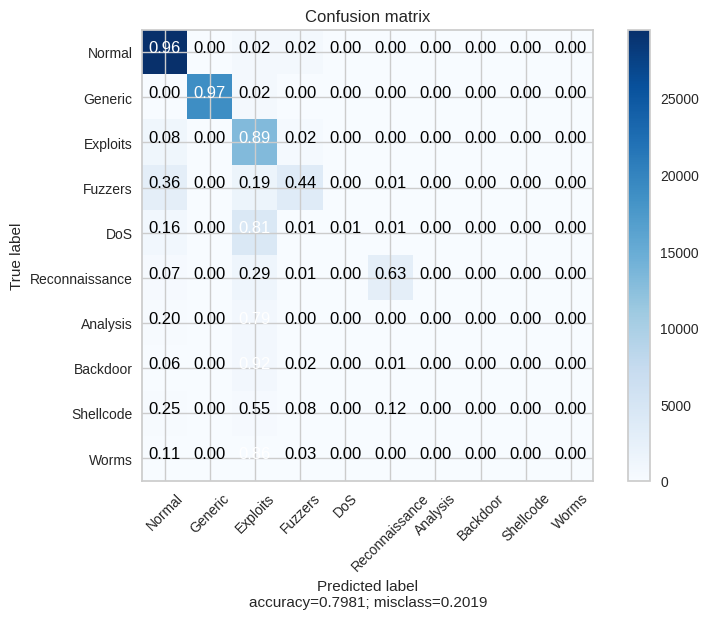

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod2, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod2, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['2']=acc

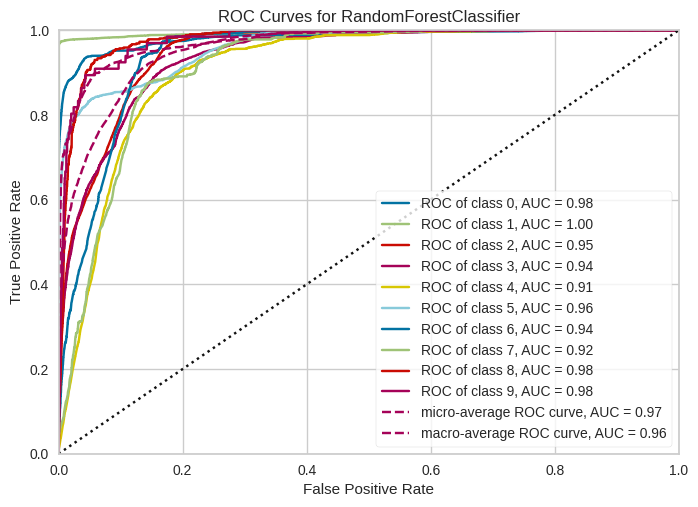

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train_mod2, y_multi_train, X_test, y_multi_test)

score on test: 0.8517194335983441
score on train: 0.9090772171696693
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     30772
           1       1.00      0.98      0.99     19423
           2       0.73      0.71      0.72     14709
           3       0.79      0.79      0.79      7921
           4       0.38      0.52      0.44      5357
           5       0.90      0.76      0.82      4578
           6       0.63      0.11      0.19       909
           7       0.51      0.08      0.14       780
           8       0.62      0.38      0.47       513
           9       0.70      0.11      0.18        66

    accuracy                           0.85     85028
   macro avg       0.72      0.54      0.57     85028
weighted avg       0.86      0.85      0.85     85028



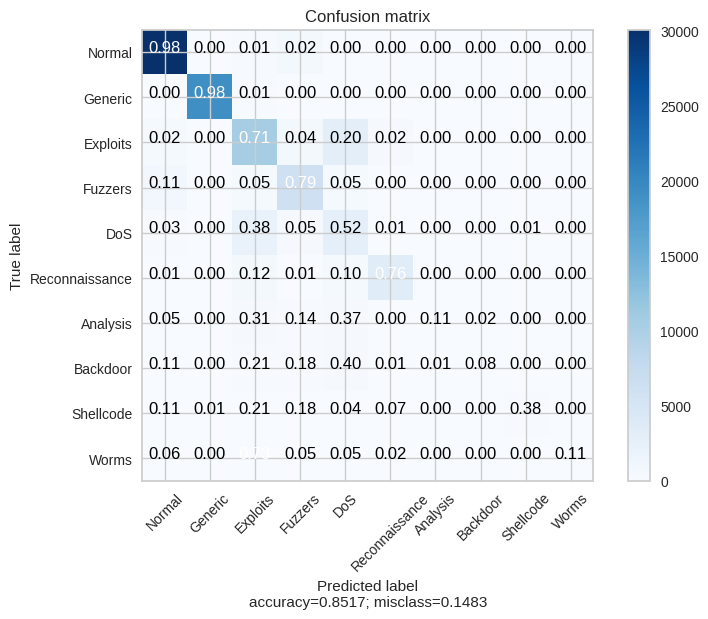

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod2, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod2, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['2']=acc

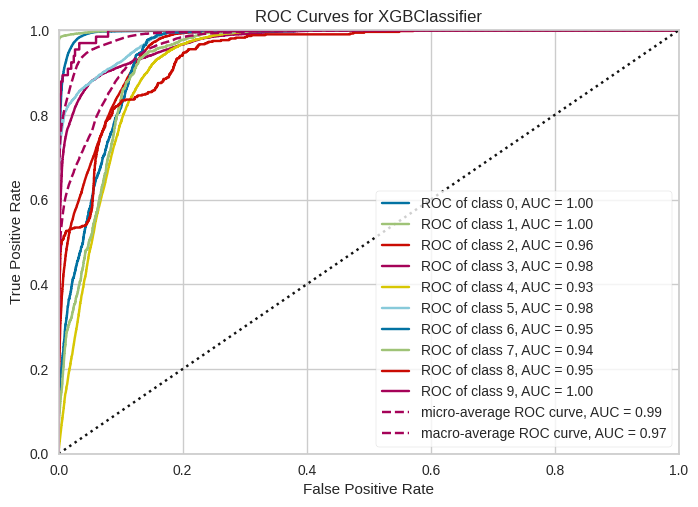

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train_mod2, y_multi_train, X_test, y_multi_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               5504      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.8160 - accuracy: 0.7022 - f1_m: 1.6790 - precision_m: 6234247.0000 - recall_m: 1.6774
Epoch 2/100
1349/

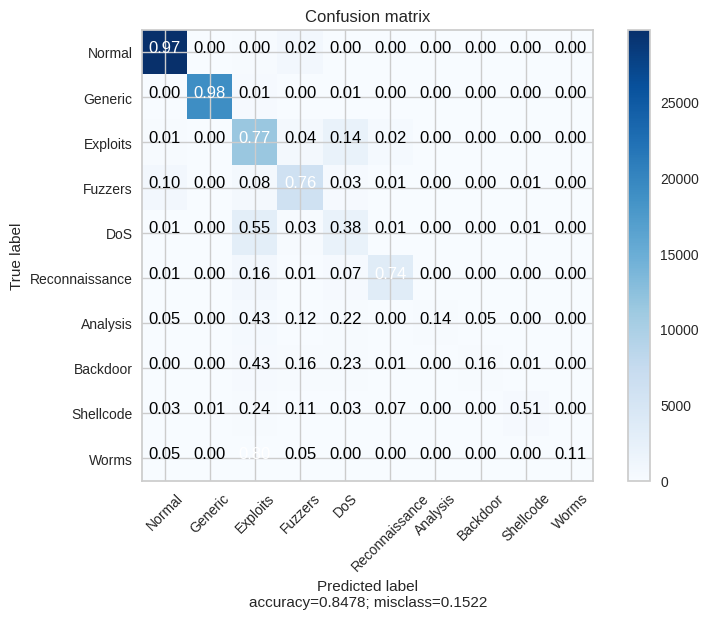

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod2,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['2']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod2,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.766777028566272


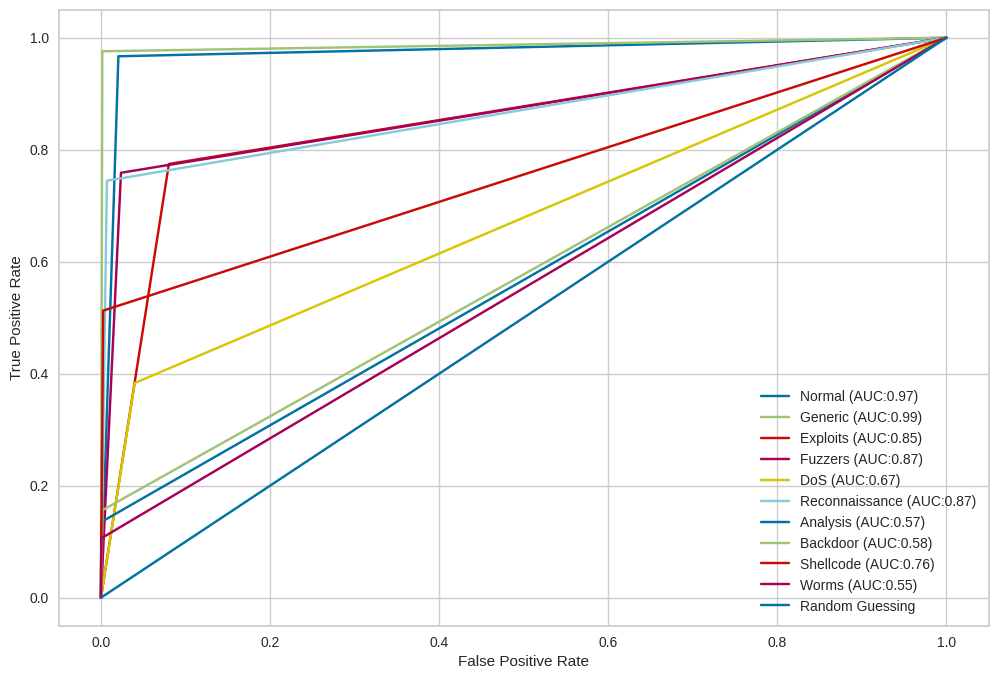

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 1,5

In [ ]:
noise3 = 3
X_train_mod3 = modify_dataset(X_train, variables_to_poison, noise3)

X_train_mod3

array([[ 1.79214449, -0.2082886 ,  2.4571585 , ..., -6.83623119,
        -1.18443845, -0.12070382],
       [-0.57638416,  1.78686151,  1.12655572, ...,  1.79987319,
        -8.5542165 , -0.12070382],
       [-1.0569863 , -0.20828827, -1.44776485, ...,  1.98108405,
         7.022288  , -0.12070382],
       ...,
       [-0.47187522, -0.06694436, -0.31449456, ..., -3.62903686,
         3.60652317, -0.12070382],
       [-0.1666061 , -0.18783648, -5.31632395, ...,  2.40447373,
         3.9506843 , -0.12070382],
       [-0.6757627 , -0.20011705, -0.42302625, ..., -2.41982954,
         4.91014323, -0.12070382]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8926353671731665
score on train: 0.8934773793662747
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     30772
           1       0.88      0.97      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



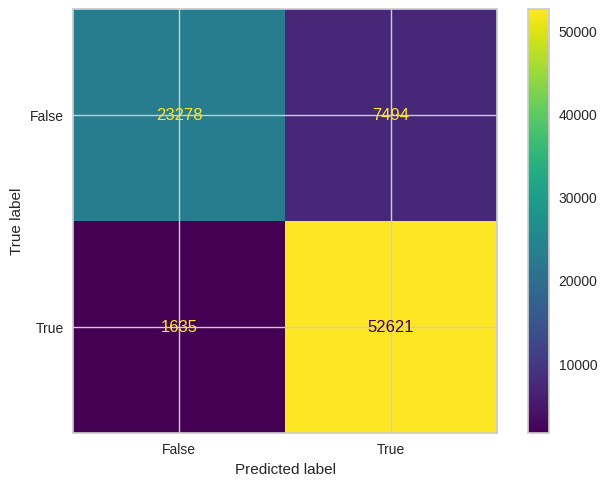

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod3, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod3, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['3']=acc

AUC: 0.9540


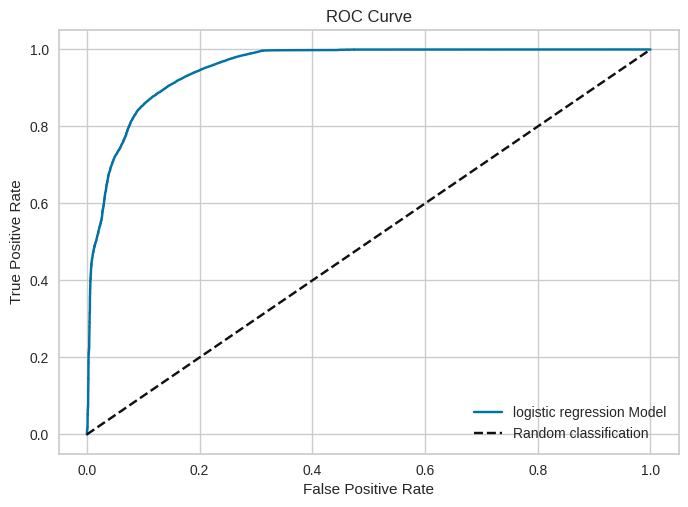

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-45-1b3f14efa2b7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod3, y_train)


score on test: 0.9538269746436469
score on train: 0.9503157041070498
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     30772
           1       0.95      0.98      0.96     54256

    accuracy                           0.95     85028
   macro avg       0.95      0.95      0.95     85028
weighted avg       0.95      0.95      0.95     85028



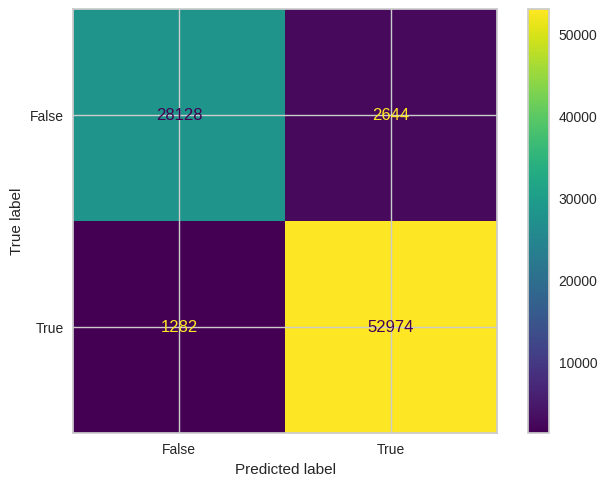

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod3, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod3, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['3']=acc

AUC: 0.9885


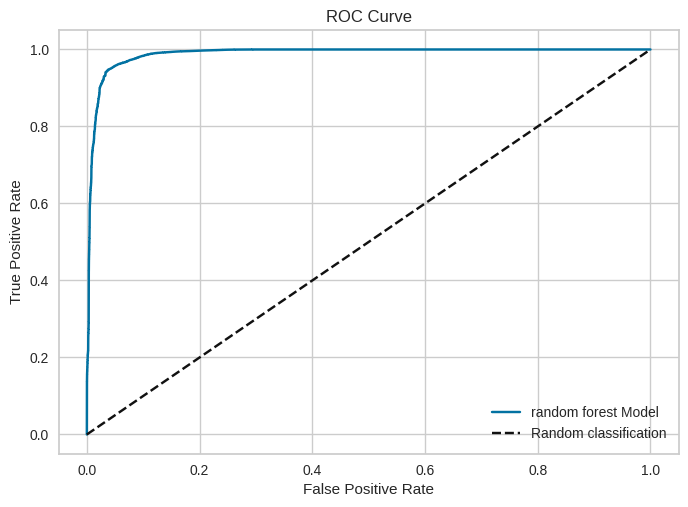

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.968904360916404
score on train: 0.992191391994439
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30772
           1       0.97      0.98      0.98     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



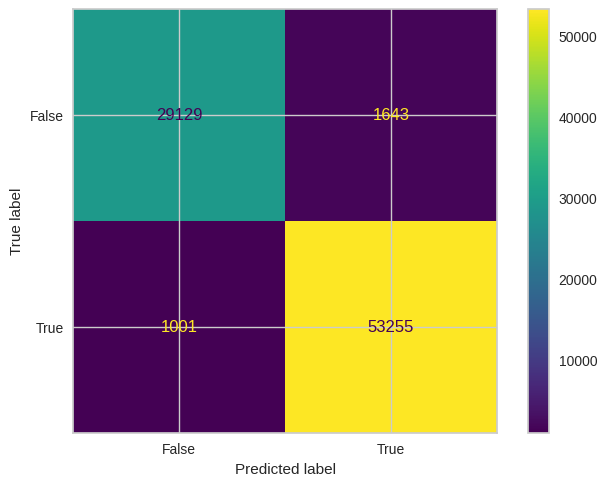

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod3, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod3, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['3']=acc

AUC: 0.9961


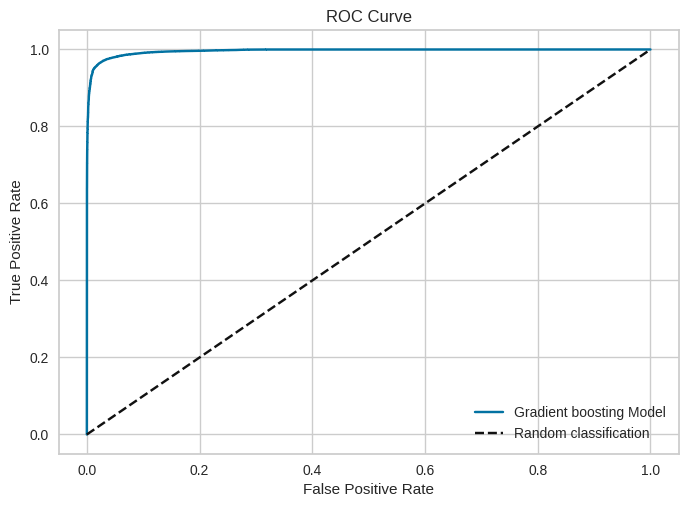

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2416 - accuracy: 0.8909 - f1_m: 0.9175 - precision_m: 0.8866 - recall_m: 0.9522
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1876 - accuracy: 0.9142 - f1_m: 0.9337 - precision_m: 0.9176 - recall_m: 0.9516
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1691 - accuracy: 0.9213 - f1_m: 0.9389 - precision_m: 0.9280 - recall_m: 0.9510
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1527 - accuracy: 0.9287 - f1_m: 0.9442 - precision_m: 0.9390 - recall_m: 0.9504
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1374 - accuracy: 0.9377 - f1_m: 0.9511 - precision_m: 0.9490 - recall_m: 0.9540
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1168 - accuracy: 0.9497 - f1_m: 0.9605 - precision_m: 0.9598 - recall_m: 0.9617
Epoch 7/100
1349/1349 [=======================

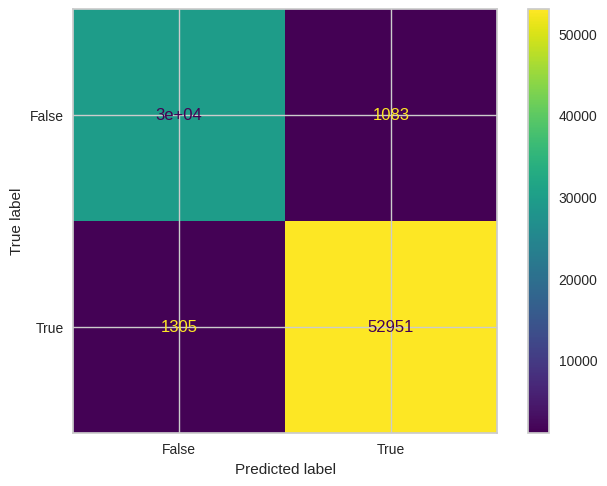

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod3, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod3,y_train)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['3']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

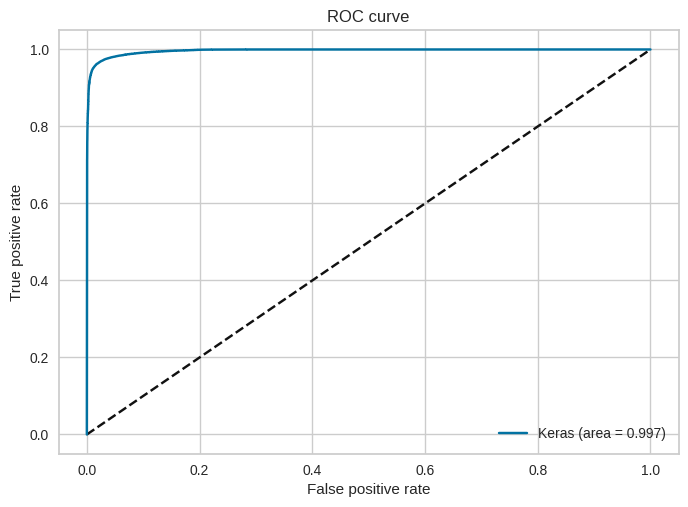

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.805028931646046
score on train: 0.82693622197764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     30772
           1       0.97      0.97      0.97     19423
           2       0.60      0.81      0.69     14709
           3       0.69      0.59      0.63      7921
           4       0.42      0.17      0.24      5357
           5       0.70      0.72      0.71      4578
           6       0.67      0.02      0.04       909
           7       0.16      0.02      0.03       780
           8       0.43      0.01      0.01       513
           9       0.00      0.00      0.00        66

    accuracy                           0.81     85028
   macro avg       0.55      0.42      0.42     85028
weighted avg       0.79      0.81      0.79     85028



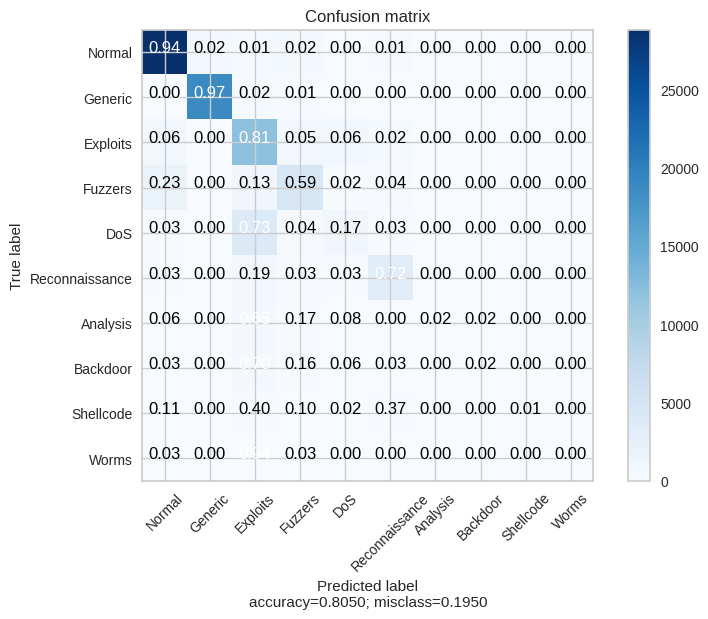

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod3, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod3, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['3']=acc

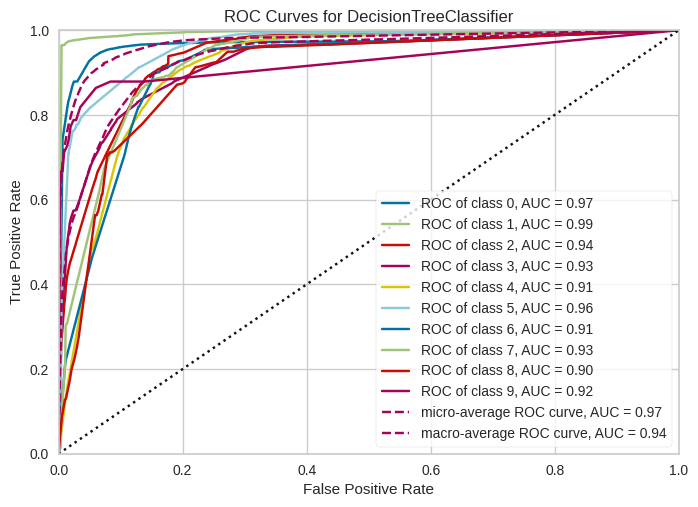

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train_mod3, y_multi_train, X_test, y_multi_test)

<ipython-input-53-c801b2656da6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod3, y_multi_train)


score on test: 0.7935268382179987
score on train: 0.8144528760933789
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     30772
           1       1.00      0.97      0.98     19423
           2       0.57      0.89      0.69     14709
           3       0.77      0.41      0.53      7921
           4       0.84      0.01      0.02      5357
           5       0.96      0.54      0.69      4578
           6       1.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.79     85028
   macro avg       0.60      0.38      0.38     85028
weighted avg       0.81      0.79      0.75     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


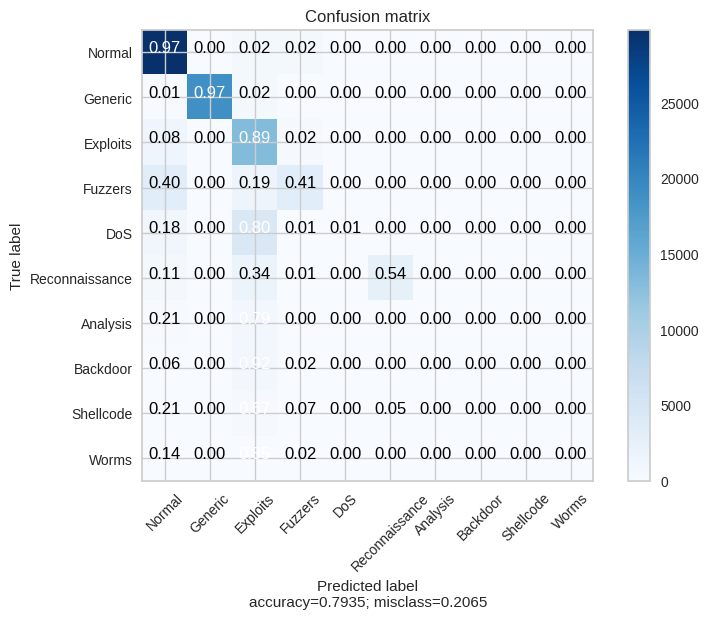

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod3, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod3, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['3']=acc

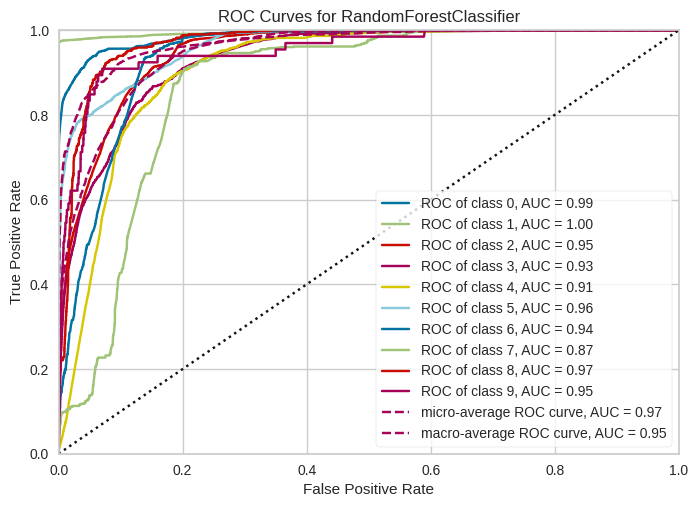

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train_mod3, y_multi_train, X_test, y_multi_test)

score on test: 0.8516488686079879
score on train: 0.9072640908300991
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30772
           1       1.00      0.98      0.99     19423
           2       0.72      0.72      0.72     14709
           3       0.78      0.79      0.79      7921
           4       0.38      0.49      0.43      5357
           5       0.84      0.78      0.81      4578
           6       0.65      0.10      0.17       909
           7       0.57      0.09      0.15       780
           8       0.73      0.30      0.42       513
           9       0.64      0.27      0.38        66

    accuracy                           0.85     85028
   macro avg       0.73      0.55      0.58     85028
weighted avg       0.86      0.85      0.85     85028



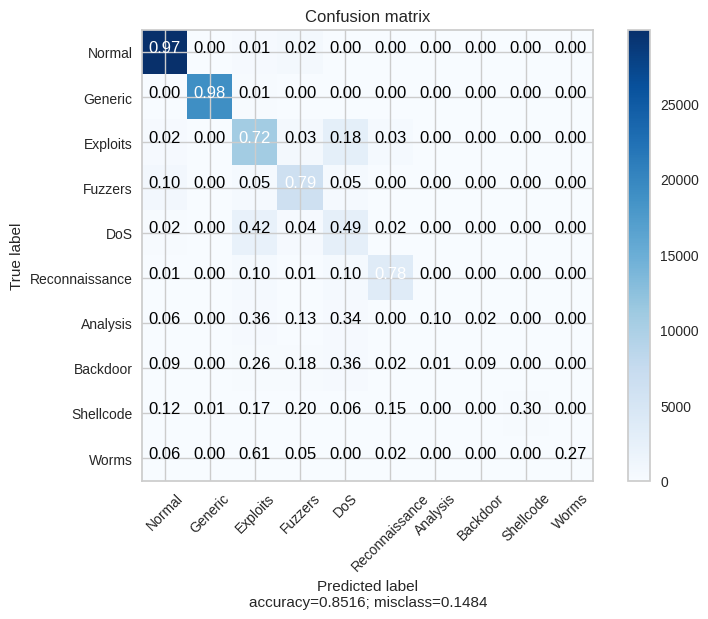

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod3, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod3, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['3']=acc

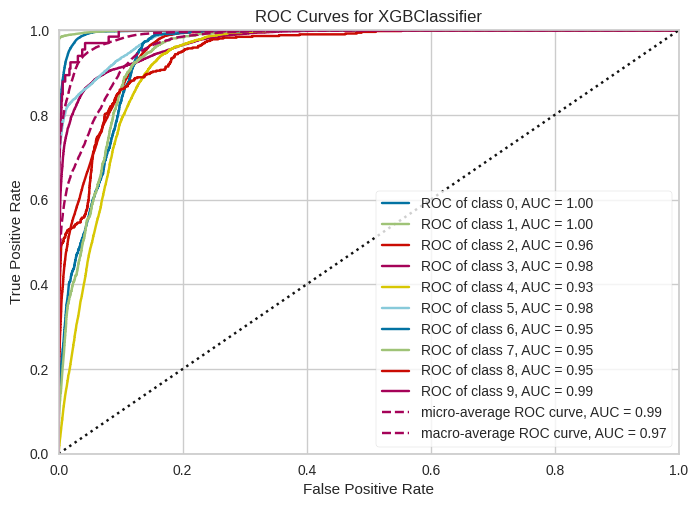

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train_mod3, y_multi_train, X_test, y_multi_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               5504      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.8478 - accuracy: 0.6924 - f1_m: 1.6986 - precision_m: 1.8692 - recall_m: 1.6835
Epoch 2/100
1349/1349 [

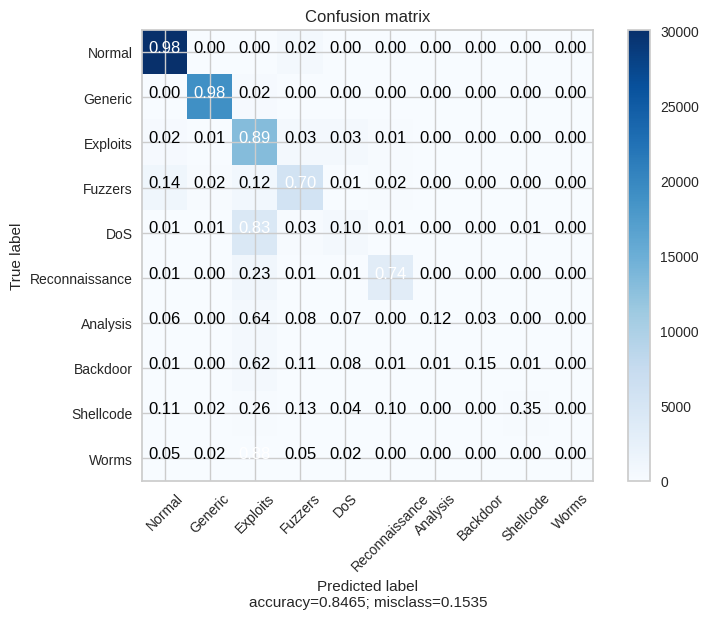

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod3,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['3']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod3,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.7407588822697762


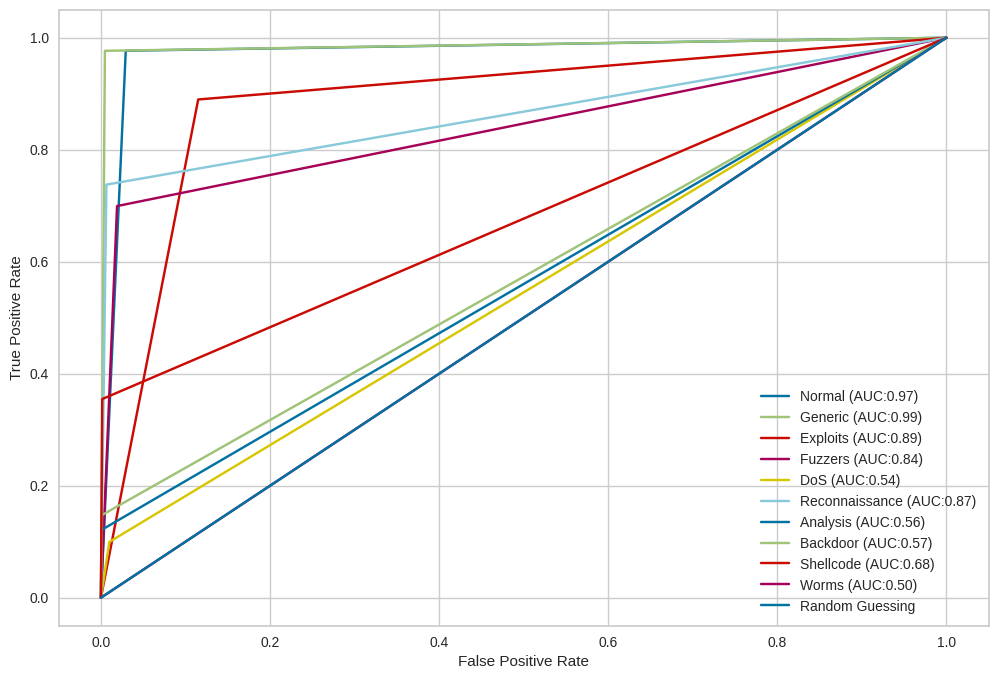

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 2

In [ ]:
noise4 = 4
X_train_mod4 = modify_dataset(X_train, variables_to_poison, noise4)

X_train_mod4

array([[ 1.79214449, -0.2082886 , -3.08683061, ..., -0.8410797 ,
         0.31502158, -0.12070382],
       [-0.57638416,  1.78686151,  9.08331212, ...,  1.29036785,
        -1.94185765, -0.12070382],
       [-1.0569863 , -0.20828827, -7.25638579, ...,  0.34067846,
        -1.6484505 , -0.12070382],
       ...,
       [-0.47187522, -0.06694436,  4.49053066, ..., -0.72809357,
        -2.84974832, -0.12070382],
       [-0.1666061 , -0.18783648, -3.83237825, ..., -2.83790831,
         0.82965585, -0.12070382],
       [-0.6757627 , -0.20011705,  2.61409594, ...,  2.11692769,
         2.65200419, -0.12070382]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8924471938655502
score on train: 0.8928575566239935
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     30772
           1       0.88      0.97      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



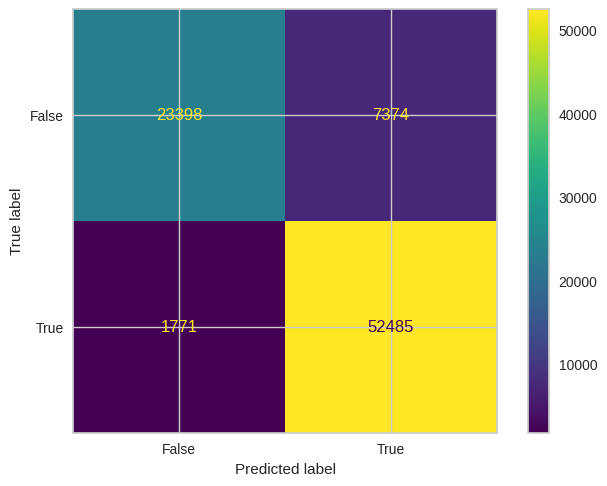

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod4, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod4, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['4']=acc

AUC: 0.9538


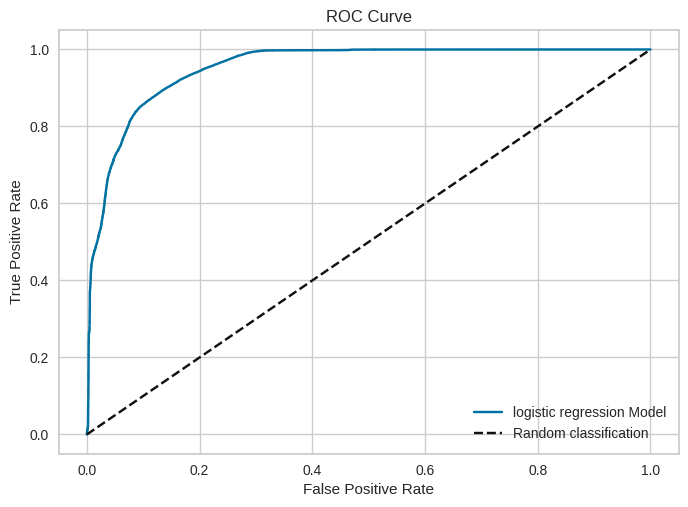

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-62-e1f13e046cab>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod4, y_train)


score on test: 0.866020604977184
score on train: 0.9475931182297399
              precision    recall  f1-score   support

           0       0.75      0.94      0.83     30772
           1       0.96      0.83      0.89     54256

    accuracy                           0.87     85028
   macro avg       0.86      0.88      0.86     85028
weighted avg       0.88      0.87      0.87     85028



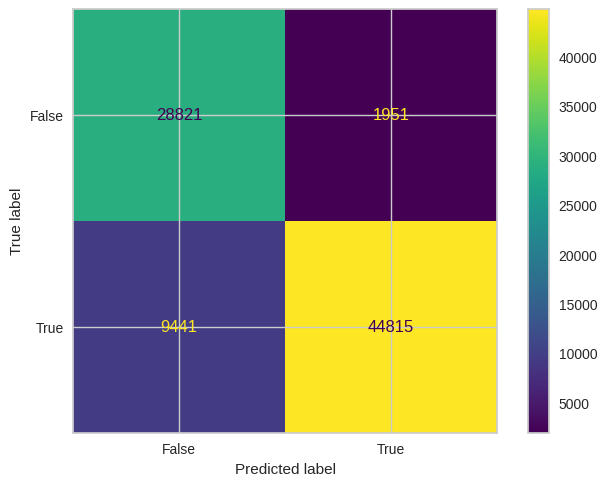

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod4, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod4, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['4']=acc

AUC: 0.9654


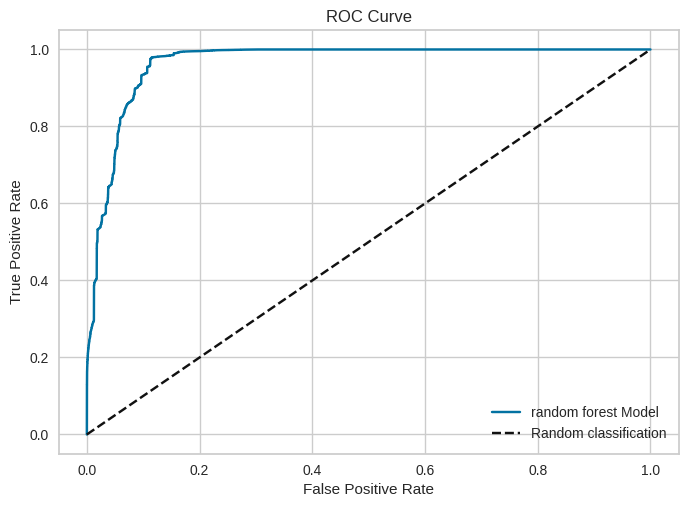

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9683751234887331
score on train: 0.9921682210508023
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     30772
           1       0.97      0.98      0.98     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



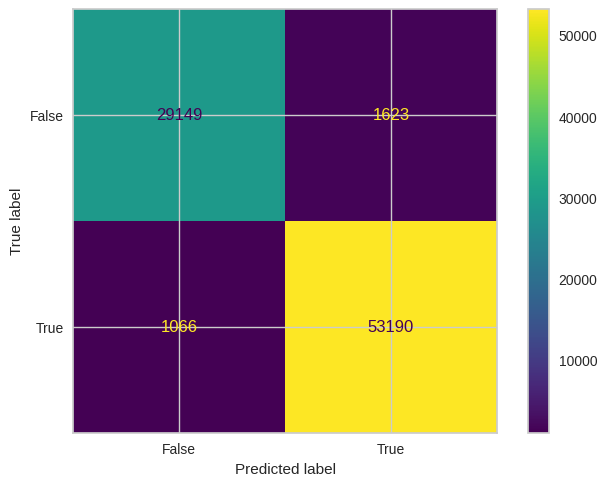

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod4, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod4, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['4']=acc

AUC: 0.9959


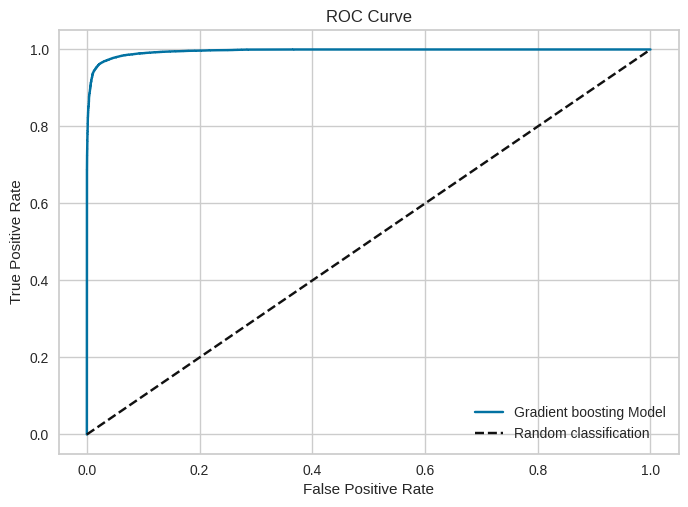

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2533 - accuracy: 0.8847 - f1_m: 0.9129 - precision_m: 0.8802 - recall_m: 0.9499
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1917 - accuracy: 0.9118 - f1_m: 0.9320 - precision_m: 0.9140 - recall_m: 0.9518
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1769 - accuracy: 0.9193 - f1_m: 0.9375 - precision_m: 0.9235 - recall_m: 0.9528
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1577 - accuracy: 0.9292 - f1_m: 0.9449 - precision_m: 0.9358 - recall_m: 0.9550
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1299 - accuracy: 0.9438 - f1_m: 0.9560 - precision_m: 0.9520 - recall_m: 0.9607
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1103 - accuracy: 0.9526 - f1_m: 0.9628 - precision_m: 0.9613 - recall_m: 0.9649
Epoch 7/100
1349/1349 [=======================

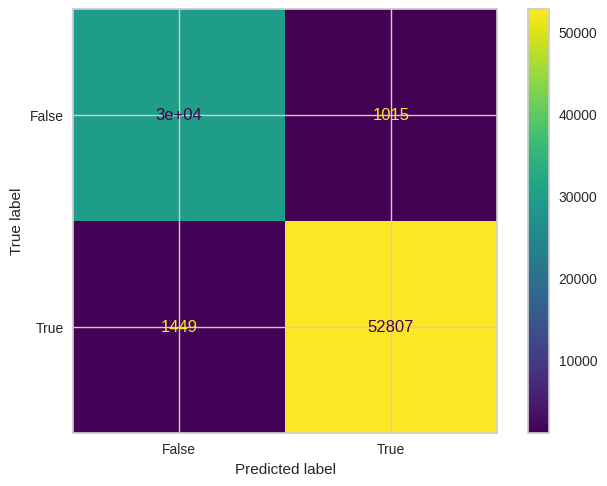

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod4, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod4,y_train)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['4']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

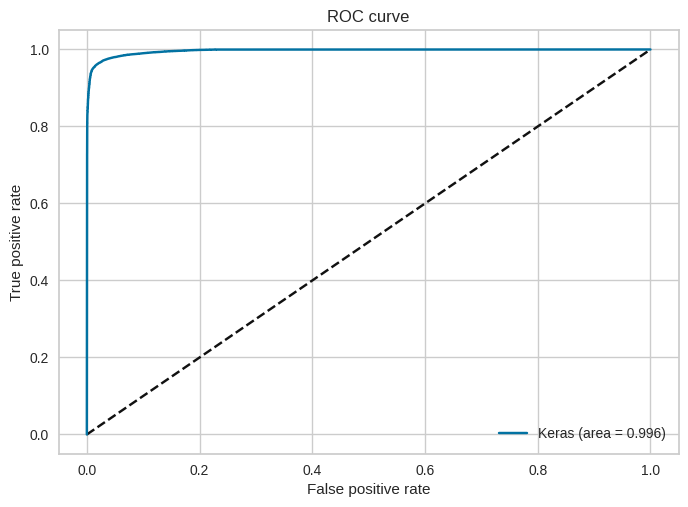

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.805040692477772
score on train: 0.8268840873544575
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     30772
           1       0.98      0.96      0.97     19423
           2       0.59      0.83      0.69     14709
           3       0.69      0.59      0.63      7921
           4       0.44      0.13      0.20      5357
           5       0.68      0.72      0.70      4578
           6       0.69      0.02      0.05       909
           7       0.16      0.02      0.03       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.81     85028
   macro avg       0.51      0.42      0.42     85028
weighted avg       0.79      0.81      0.78     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


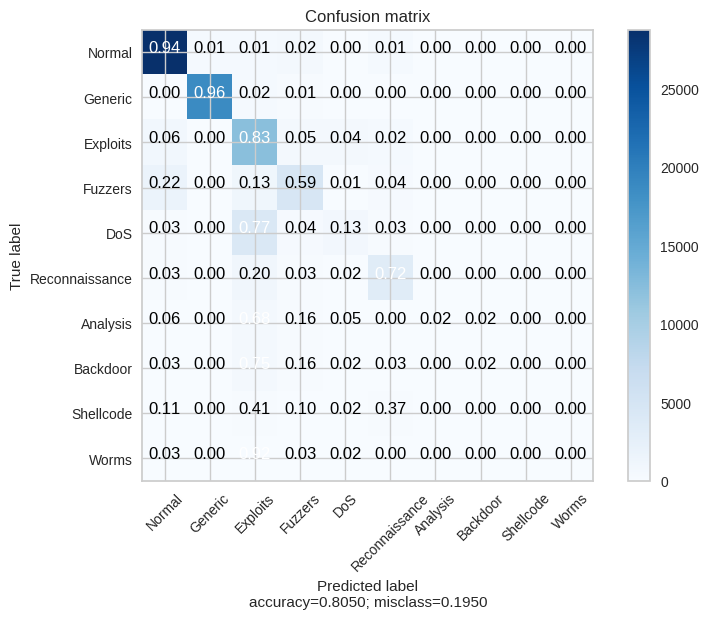

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod4, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod4, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['4']=acc

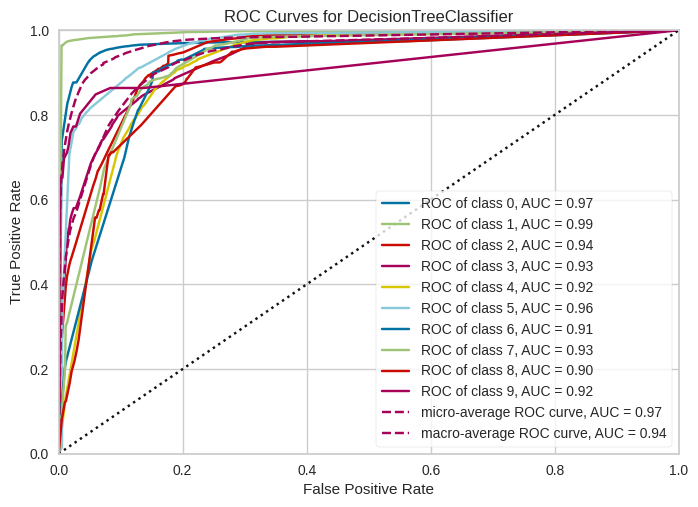

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train_mod4, y_multi_train, X_test, y_multi_test)

<ipython-input-70-7575b483ca04>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod4, y_multi_train)


score on test: 0.7454603189537564
score on train: 0.8181544343393384
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     30772
           1       1.00      0.96      0.98     19423
           2       0.65      0.69      0.67     14709
           3       0.73      0.44      0.55      7921
           4       0.84      0.01      0.01      5357
           5       0.82      0.31      0.45      4578
           6       1.00      0.00      0.00       909
           7       1.00      0.00      0.01       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.75     85028
   macro avg       0.67      0.34      0.35     85028
weighted avg       0.77      0.75      0.70     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


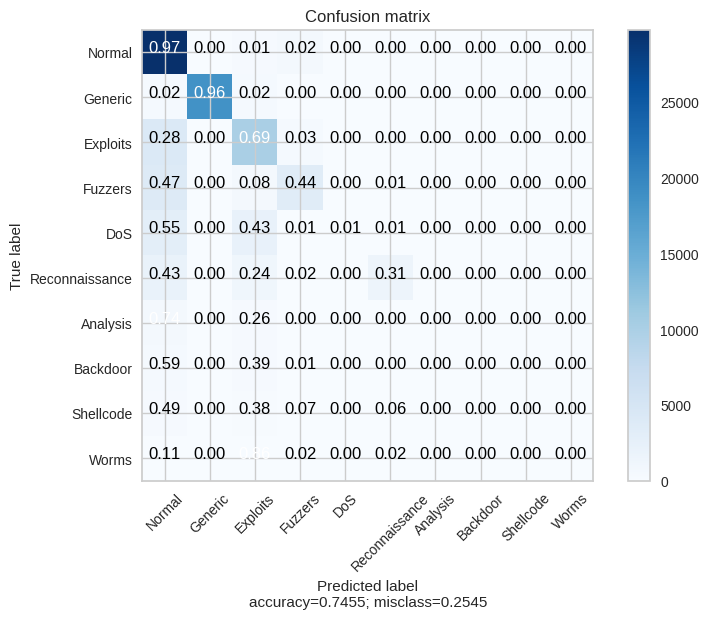

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod4, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod4, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['4']=acc

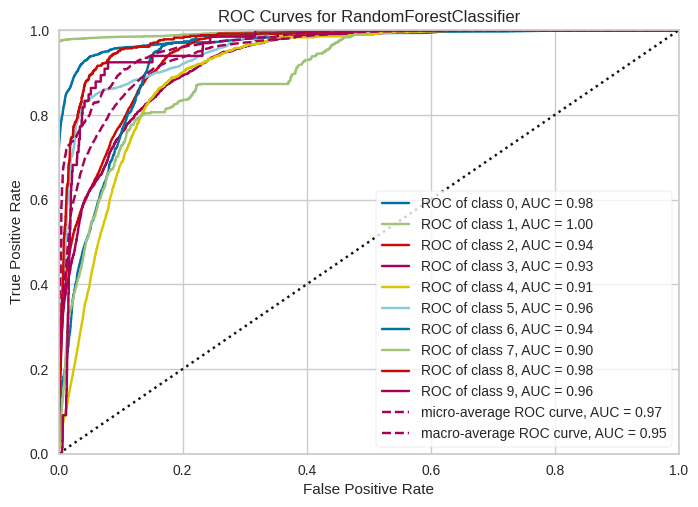

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train_mod4, y_multi_train, X_test, y_multi_test)

score on test: 0.8540010349531919
score on train: 0.9088107513178474
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     30772
           1       1.00      0.98      0.99     19423
           2       0.69      0.78      0.73     14709
           3       0.78      0.79      0.79      7921
           4       0.39      0.38      0.39      5357
           5       0.88      0.77      0.82      4578
           6       0.65      0.11      0.19       909
           7       0.69      0.08      0.14       780
           8       0.69      0.33      0.44       513
           9       0.64      0.11      0.18        66

    accuracy                           0.85     85028
   macro avg       0.74      0.53      0.56     85028
weighted avg       0.85      0.85      0.85     85028



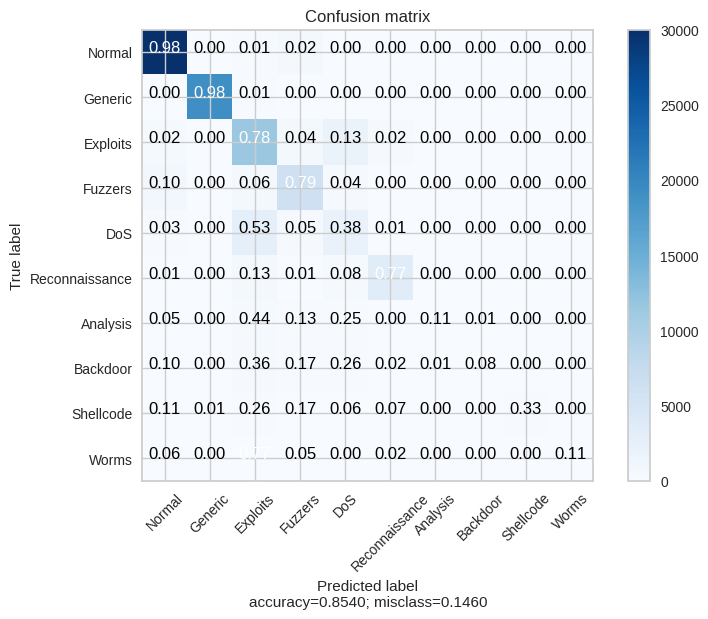

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod4, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod4, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['4']=acc

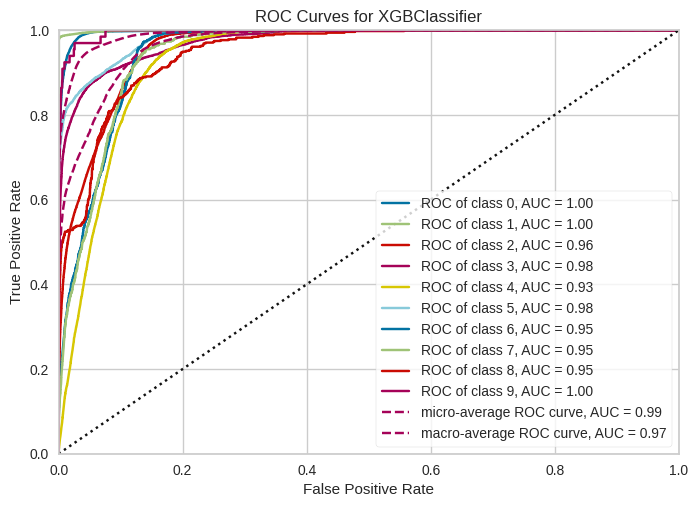

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train_mod4, y_multi_train, X_test, y_multi_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               5504      
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.8790 - accuracy: 0.6797 - f1_m: 1.7411 - precision_m: 1104522.0000 - recall_m: 1.7011
Epoch 2/100
1349/

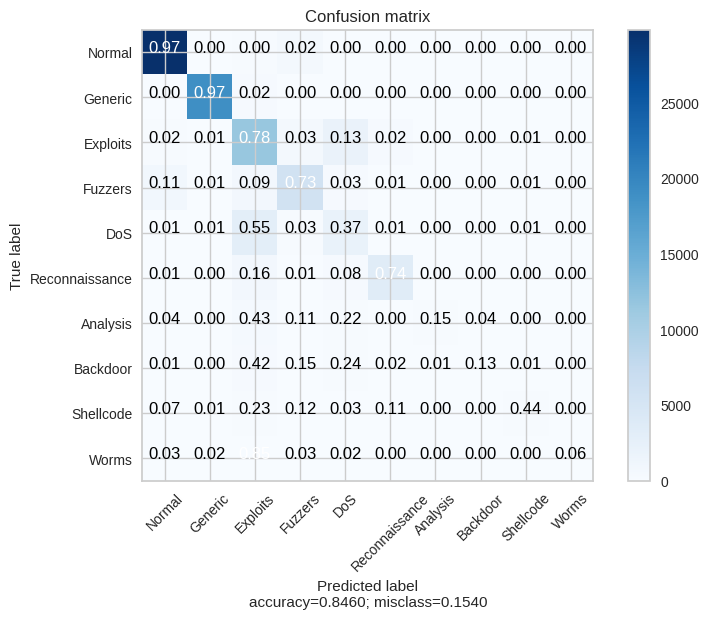

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod4,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['4']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod4,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.7593989598872701


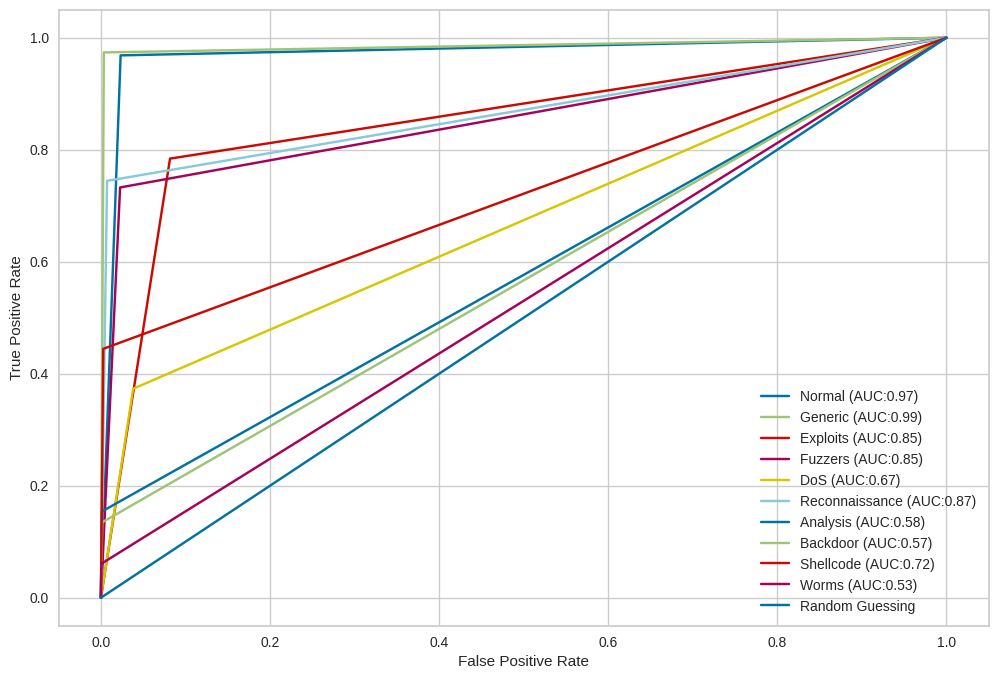

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 2.5

In [ ]:
noise5 = 5
X_train_mod5 = modify_dataset(X_train, variables_to_poison, noise5)

X_train_mod5

array([[ 1.79214449, -0.2082886 ,  4.79472788, ..., -1.0619848 ,
         4.05578695, -0.12070382],
       [-0.57638416,  1.78686151, -0.21788858, ..., -2.81272213,
        -5.94086682, -0.12070382],
       [-1.0569863 , -0.20828827, -9.28511035, ...,  2.29888573,
        -3.32639488, -0.12070382],
       ...,
       [-0.47187522, -0.06694436,  1.08694708, ..., -5.93883527,
        -4.81004228, -0.12070382],
       [-0.1666061 , -0.18783648, -2.869486  , ...,  9.93929494,
         4.69624051, -0.12070382],
       [-0.6757627 , -0.20011705,  4.21417205, ...,  2.68682551,
        -2.92994458, -0.12070382]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8921178905772216
score on train: 0.8928633493599026
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     30772
           1       0.88      0.97      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



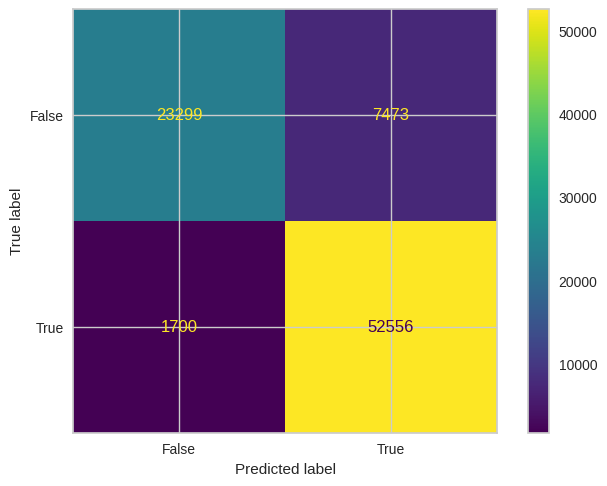

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod5, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod5, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['5']=acc

AUC: 0.9534


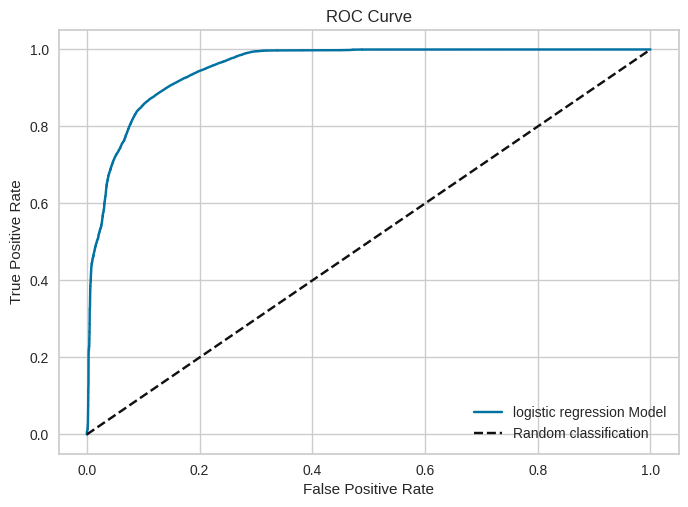

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-79-9b10e58482f5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod5, y_train)


score on test: 0.8765347885402456
score on train: 0.9476858020042866
              precision    recall  f1-score   support

           0       0.78      0.93      0.84     30772
           1       0.95      0.85      0.90     54256

    accuracy                           0.88     85028
   macro avg       0.86      0.89      0.87     85028
weighted avg       0.89      0.88      0.88     85028



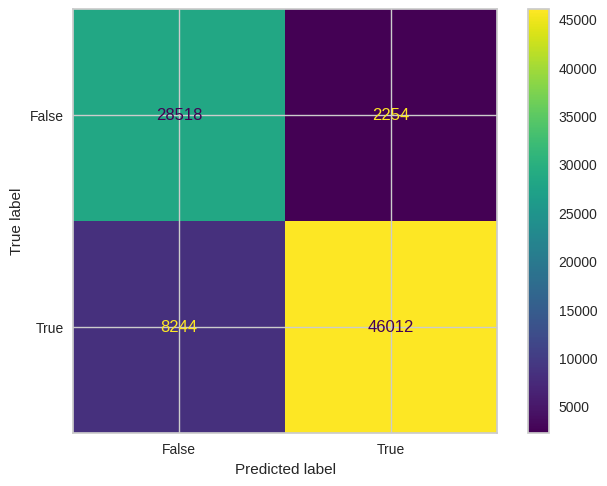

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod5, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod5, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['5']=acc

AUC: 0.9708


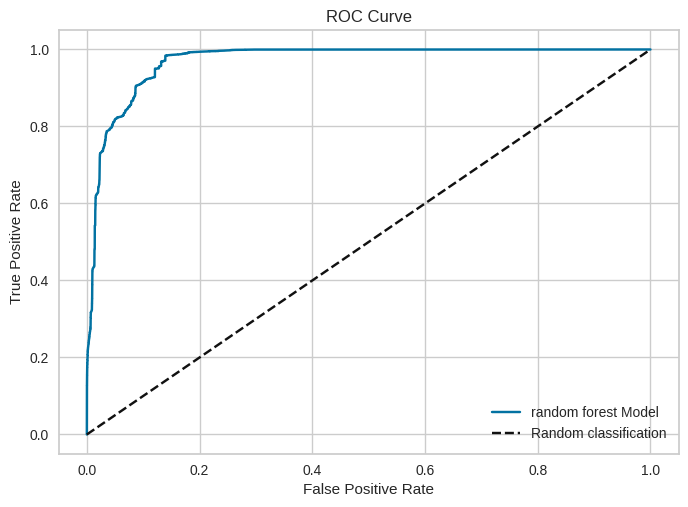

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9703509432187044
score on train: 0.991884376991253
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30772
           1       0.97      0.98      0.98     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



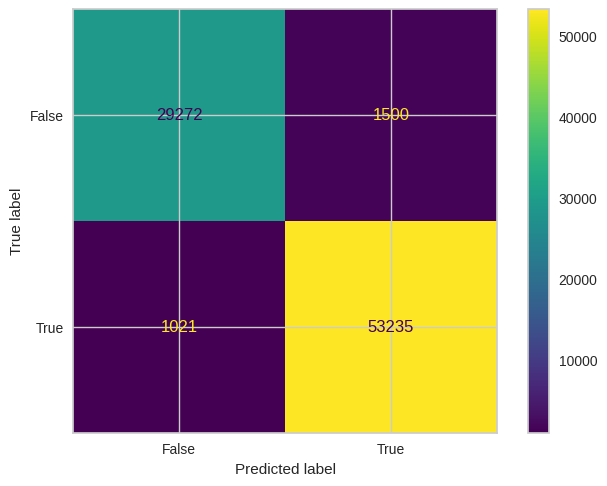

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod5, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod5, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['5']=acc

AUC: 0.9962


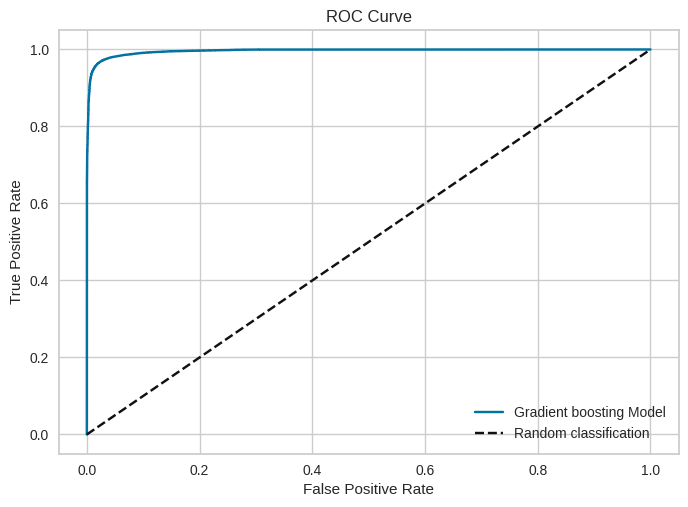

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.8803 - f1_m: 0.9100 - precision_m: 0.8756 - recall_m: 0.9487
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2024 - accuracy: 0.9059 - f1_m: 0.9280 - precision_m: 0.9051 - recall_m: 0.9531
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1791 - accuracy: 0.9160 - f1_m: 0.9350 - precision_m: 0.9217 - recall_m: 0.9497
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1621 - accuracy: 0.9240 - f1_m: 0.9408 - precision_m: 0.9324 - recall_m: 0.9503
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1491 - accuracy: 0.9313 - f1_m: 0.9462 - precision_m: 0.9411 - recall_m: 0.9522
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1392 - accuracy: 0.9380 - f1_m: 0.9514 - precision_m: 0.9484 - recall_m: 0.9550
Epoch 7/100
1349/1349 [=======================

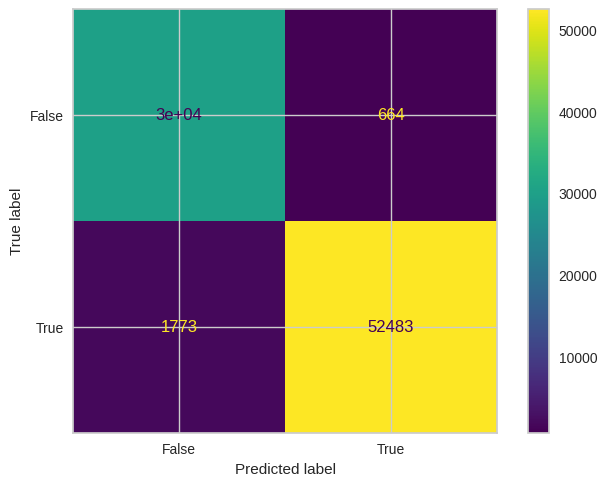

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod5, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod5,y_train)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['5']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

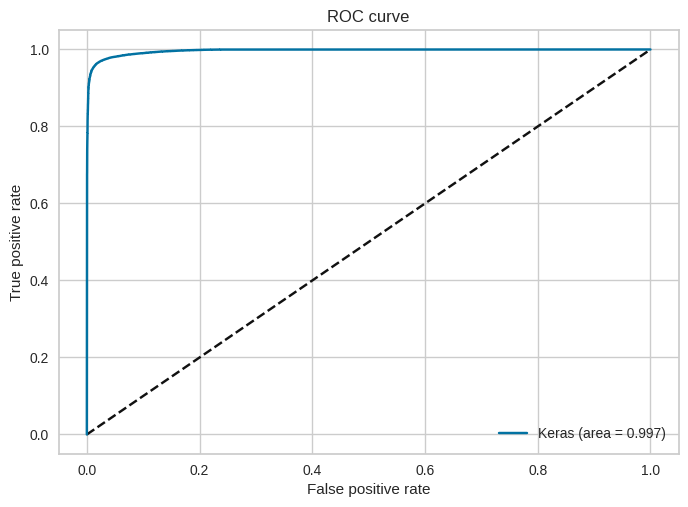

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.770369760549466
score on train: 0.8269130510340034
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     30772
           1       0.96      0.81      0.88     19423
           2       0.59      0.83      0.69     14709
           3       0.69      0.59      0.63      7921
           4       0.43      0.13      0.20      5357
           5       0.70      0.72      0.71      4578
           6       0.67      0.02      0.04       909
           7       0.00      0.02      0.01       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.77     85028
   macro avg       0.50      0.41      0.41     85028
weighted avg       0.79      0.77      0.76     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


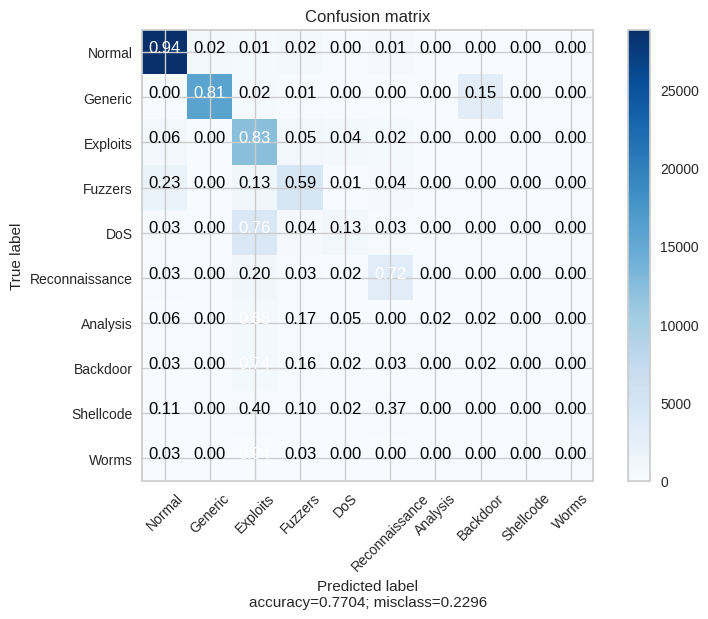

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod5, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod5, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['5']=acc

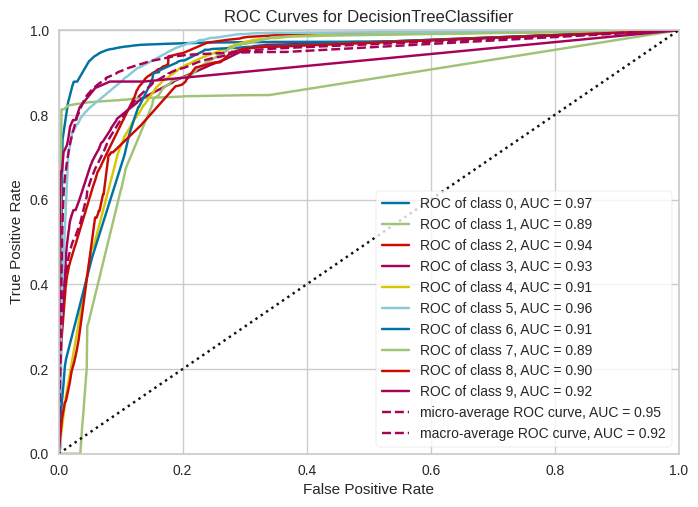

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train_mod5, y_multi_train, X_test, y_multi_test)

<ipython-input-87-adb9130efb5e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod5, y_multi_train)


score on test: 0.7773321729312697
score on train: 0.8182355326420668
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     30772
           1       1.00      0.96      0.98     19423
           2       0.61      0.85      0.71     14709
           3       0.72      0.43      0.54      7921
           4       0.72      0.01      0.02      5357
           5       0.90      0.34      0.50      4578
           6       1.00      0.00      0.00       909
           7       1.00      0.00      0.01       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.78     85028
   macro avg       0.67      0.36      0.36     85028
weighted avg       0.79      0.78      0.73     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


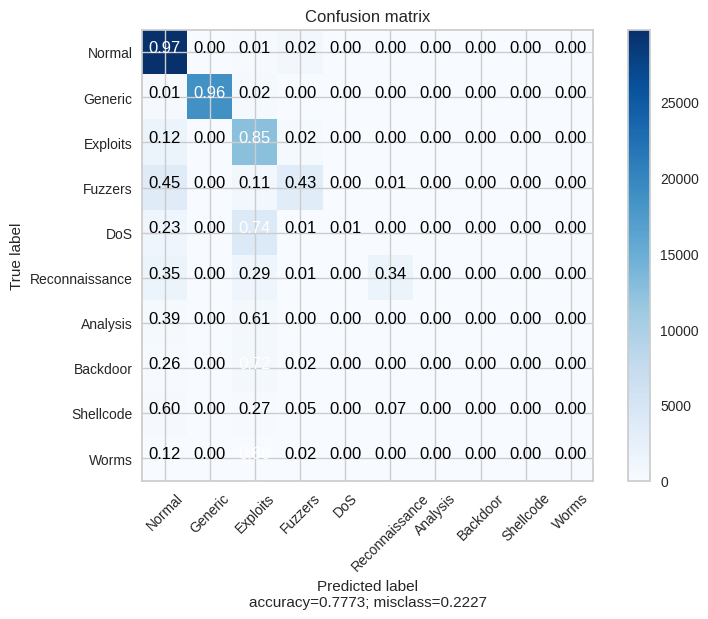

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod5, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod5, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['5']=acc

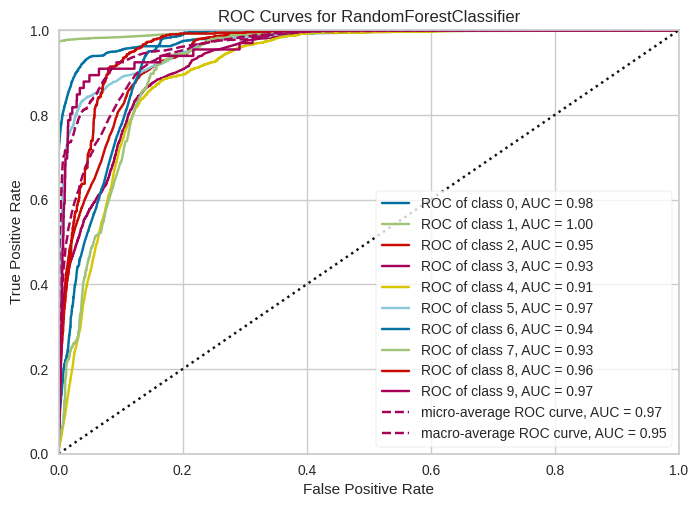

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train_mod5, y_multi_train, X_test, y_multi_test)

score on test: 0.8534129933668909
score on train: 0.9074378729073741
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30772
           1       1.00      0.98      0.99     19423
           2       0.67      0.80      0.73     14709
           3       0.82      0.76      0.79      7921
           4       0.40      0.38      0.39      5357
           5       0.89      0.76      0.82      4578
           6       0.61      0.11      0.19       909
           7       0.60      0.07      0.12       780
           8       0.73      0.30      0.42       513
           9       0.73      0.24      0.36        66

    accuracy                           0.85     85028
   macro avg       0.74      0.54      0.58     85028
weighted avg       0.85      0.85      0.85     85028



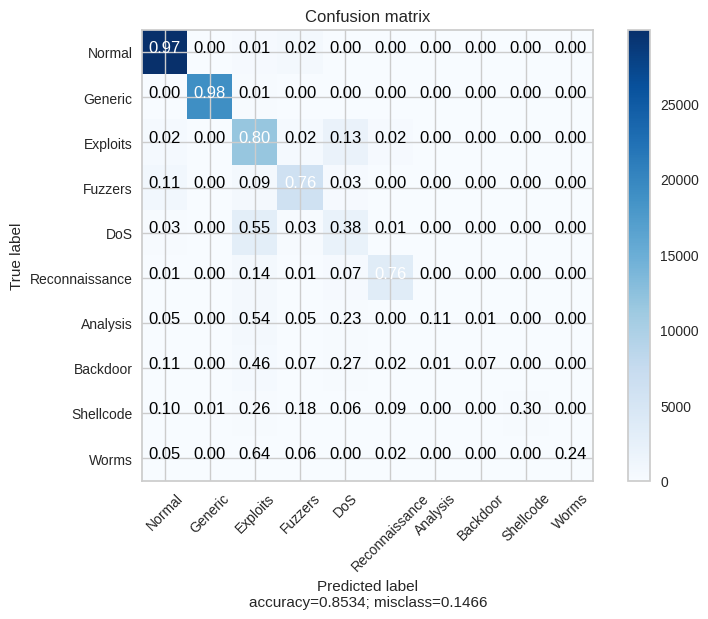

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod5, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod5, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['5']=acc

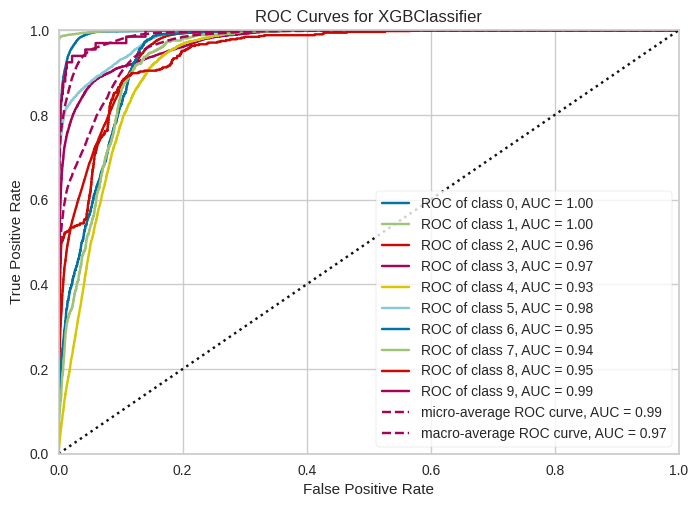

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train_mod5, y_multi_train, X_test, y_multi_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               5504      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.9108 - accuracy: 0.6693 - f1_m: 1.7637 - precision_m: 1.8917 - recall_m: 1.7088
Epoch 2/100
1349/1349 [

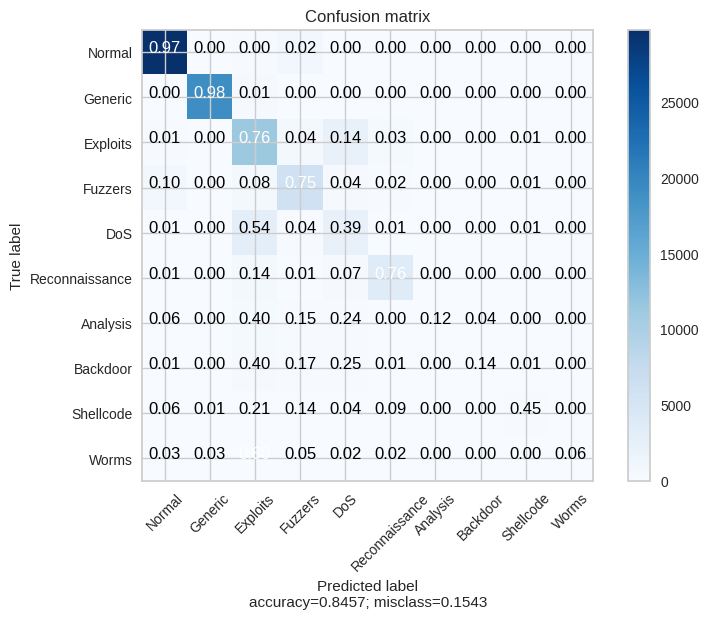

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod5,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['5']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod5,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.7599266831939349


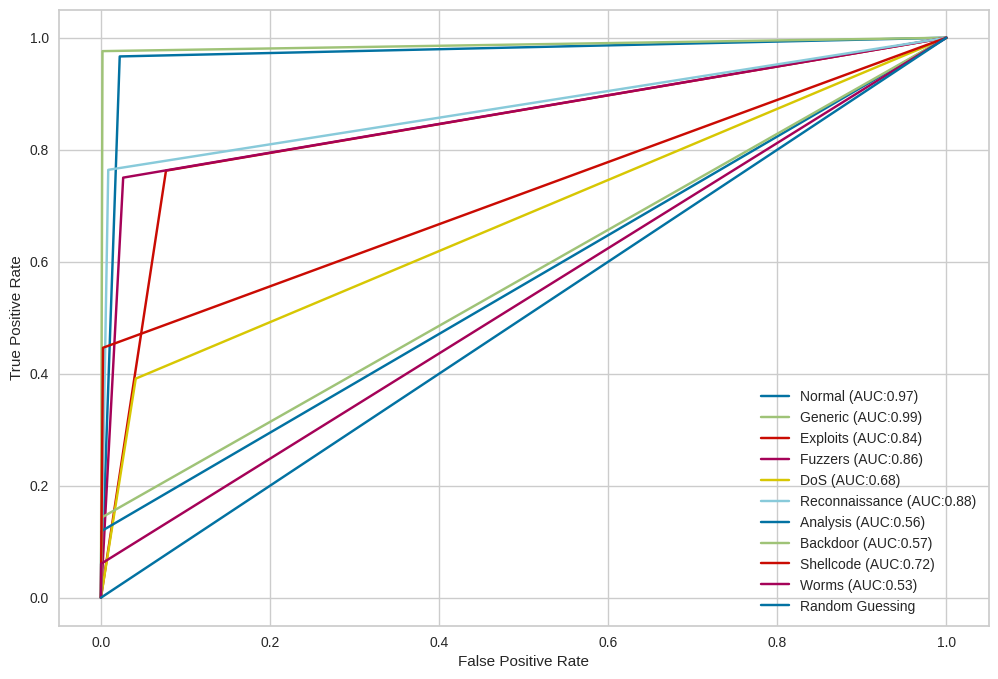

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 3

In [ ]:
noise6 = 6
X_train_mod6 = modify_dataset(X_train, variables_to_poison, noise6)

X_train_mod6

array([[ 1.79214449, -0.2082886 ,  3.79655808, ...,  0.89924558,
        -0.3952588 , -0.12070382],
       [-0.57638416,  1.78686151, -3.32366538, ..., -2.90888974,
         7.8279375 , -0.12070382],
       [-1.0569863 , -0.20828827,  3.46781103, ...,  9.6926833 ,
         3.01798364, -0.12070382],
       ...,
       [-0.47187522, -0.06694436, -0.24042675, ...,  9.16582496,
         3.1901775 , -0.12070382],
       [-0.1666061 , -0.18783648, -0.96993323, ..., -0.44809629,
         7.74497192, -0.12070382],
       [-0.6757627 , -0.20011705, -6.60339241, ..., -2.33324492,
         0.82474916, -0.12070382]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8916239356447287
score on train: 0.8925968835080809
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     30772
           1       0.87      0.97      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



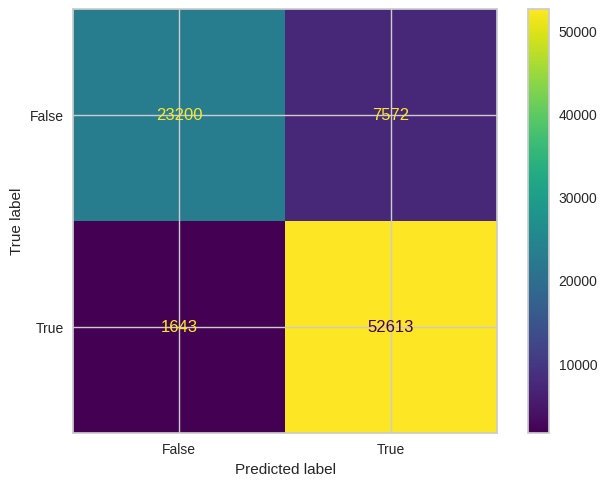

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod6, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod6, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['6']=acc

AUC: 0.9529


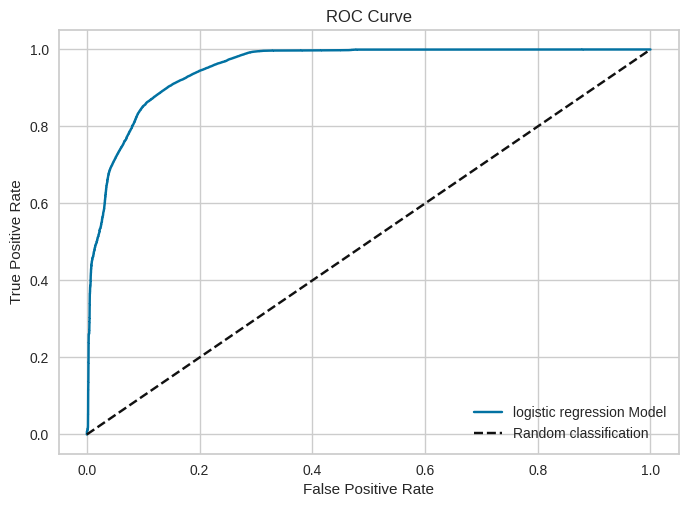

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-96-6f5d5b3d70e0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod6, y_train)


score on test: 0.8954579667874112
score on train: 0.952302612523895
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     30772
           1       0.95      0.88      0.91     54256

    accuracy                           0.90     85028
   macro avg       0.88      0.90      0.89     85028
weighted avg       0.90      0.90      0.90     85028



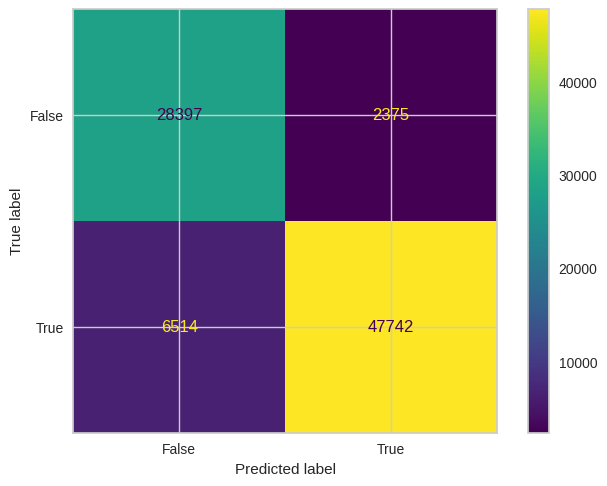

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod6, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod6, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['6']=acc

AUC: 0.9722


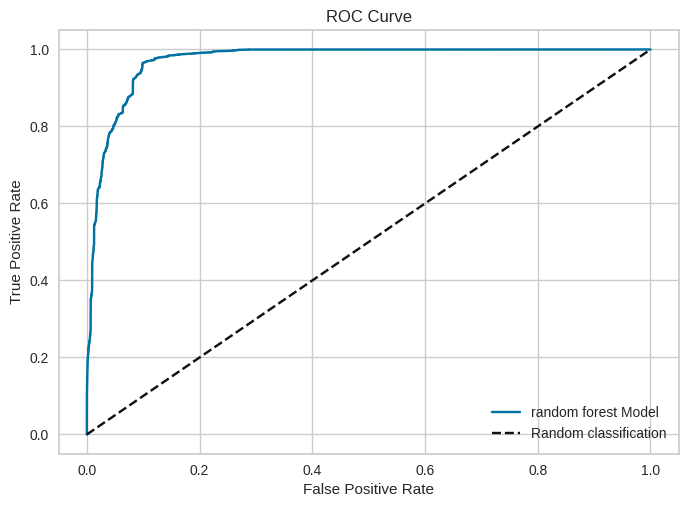

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9674577786141035
score on train: 0.9924462723744425
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     30772
           1       0.97      0.98      0.97     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.96     85028
weighted avg       0.97      0.97      0.97     85028



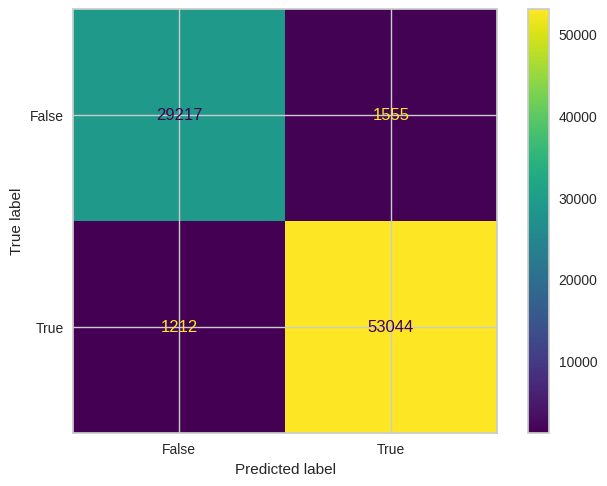

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod6, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod6, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['6']=acc

AUC: 0.9952


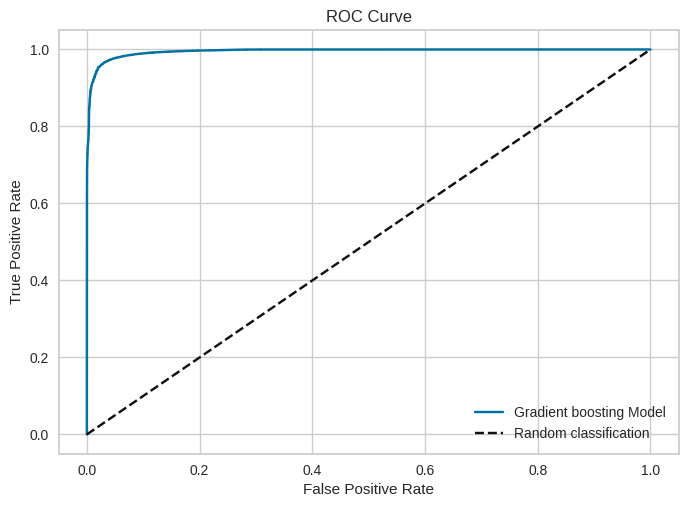

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2754 - accuracy: 0.8759 - f1_m: 0.9068 - precision_m: 0.8720 - recall_m: 0.9463
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2097 - accuracy: 0.9037 - f1_m: 0.9265 - precision_m: 0.9008 - recall_m: 0.9550
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1872 - accuracy: 0.9137 - f1_m: 0.9334 - precision_m: 0.9174 - recall_m: 0.9509
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1738 - accuracy: 0.9196 - f1_m: 0.9377 - precision_m: 0.9259 - recall_m: 0.9508
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1596 - accuracy: 0.9257 - f1_m: 0.9421 - precision_m: 0.9346 - recall_m: 0.9506
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1484 - accuracy: 0.9313 - f1_m: 0.9463 - precision_m: 0.9421 - recall_m: 0.9512
Epoch 7/100
1349/1349 [=======================

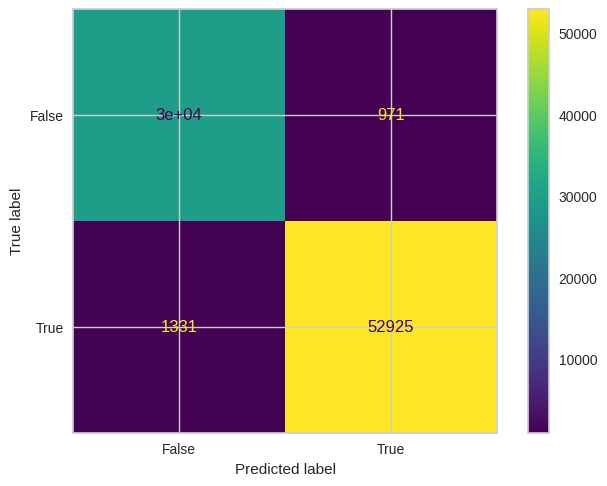

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod6, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod6,y_train)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['6']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

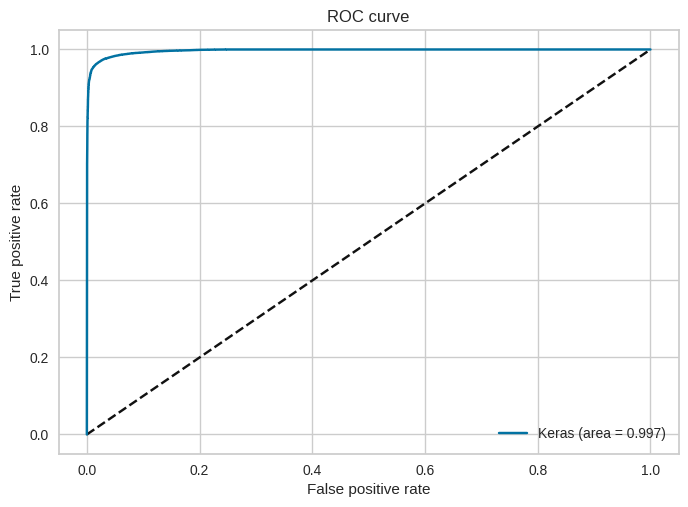

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.7619490050336359
score on train: 0.8268551236749117
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     30772
           1       0.96      0.81      0.88     19423
           2       0.57      0.83      0.68     14709
           3       0.69      0.59      0.63      7921
           4       0.44      0.13      0.20      5357
           5       0.72      0.72      0.72      4578
           6       0.67      0.02      0.04       909
           7       0.00      0.02      0.01       780
           8       0.38      0.01      0.01       513
           9       0.00      0.00      0.00        66

    accuracy                           0.76     85028
   macro avg       0.53      0.40      0.41     85028
weighted avg       0.78      0.76      0.76     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


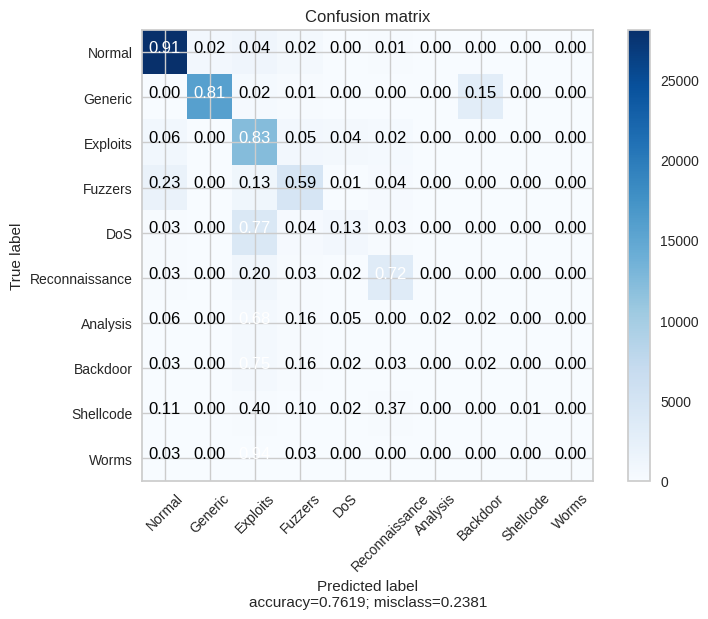

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod6, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod6, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['6']=acc

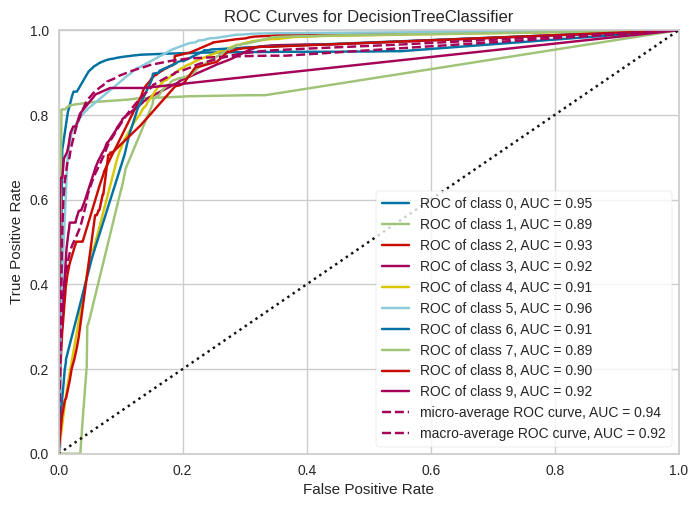

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train_mod6, y_multi_train, X_test, y_multi_test)

<ipython-input-104-3b082d3dcb17>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod6, y_multi_train)


score on test: 0.69498282918568
score on train: 0.8142559230724671
              precision    recall  f1-score   support

           0       0.59      0.98      0.73     30772
           1       1.00      0.80      0.89     19423
           2       0.72      0.62      0.67     14709
           3       0.76      0.39      0.52      7921
           4       0.59      0.01      0.02      5357
           5       0.88      0.28      0.42      4578
           6       1.00      0.00      0.01       909
           7       1.00      0.01      0.01       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.69     85028
   macro avg       0.65      0.31      0.33     85028
weighted avg       0.74      0.69      0.66     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


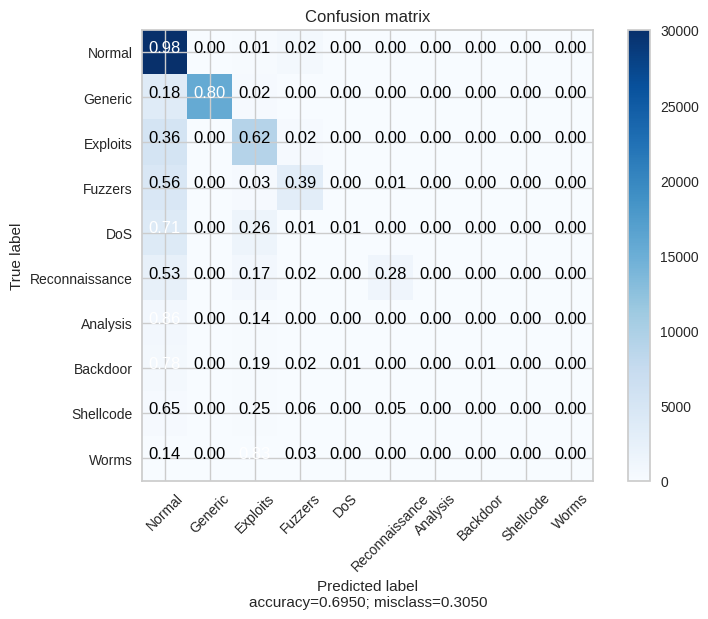

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod6, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod6, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['6']=acc

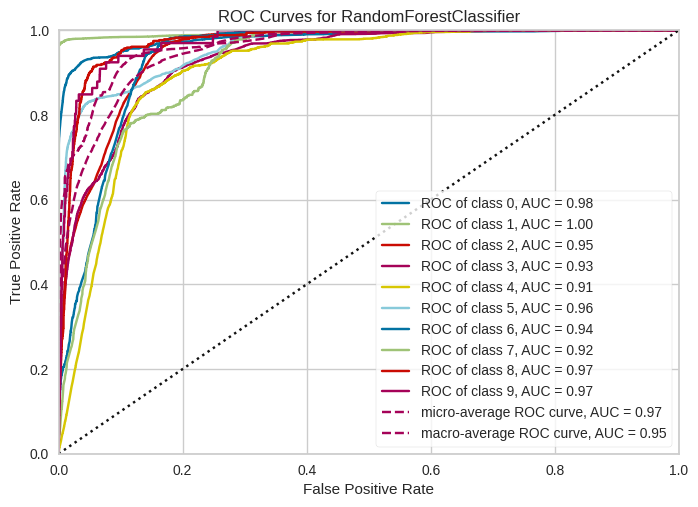

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train_mod6, y_multi_train, X_test, y_multi_test)

score on test: 0.8536246883379592
score on train: 0.9073683600764642
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30772
           1       1.00      0.98      0.99     19423
           2       0.67      0.80      0.73     14709
           3       0.78      0.79      0.79      7921
           4       0.41      0.35      0.38      5357
           5       0.90      0.75      0.82      4578
           6       0.68      0.11      0.18       909
           7       0.58      0.07      0.13       780
           8       0.70      0.31      0.43       513
           9       0.50      0.03      0.06        66

    accuracy                           0.85     85028
   macro avg       0.72      0.52      0.55     85028
weighted avg       0.85      0.85      0.85     85028



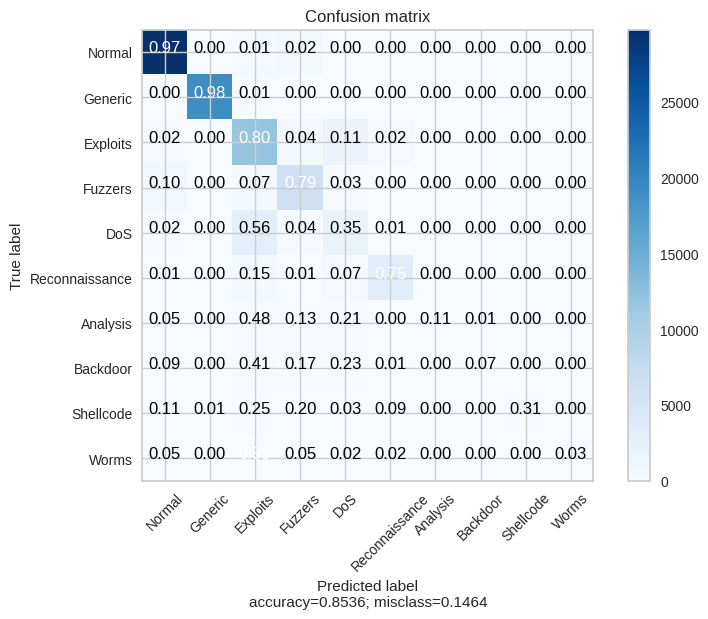

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod6, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod6, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['6']=acc

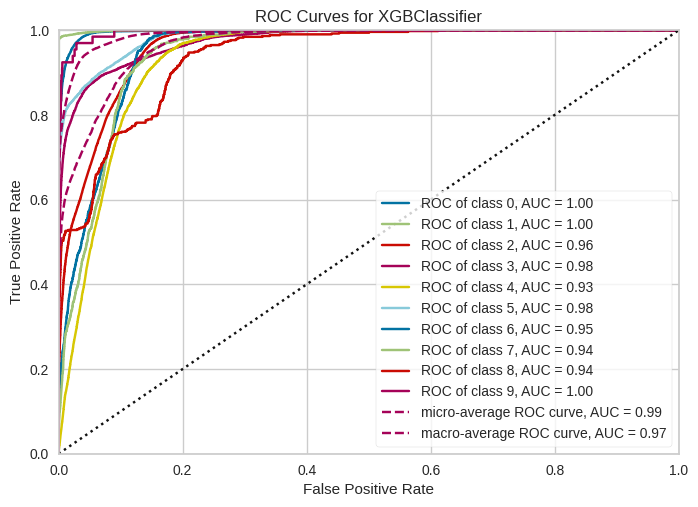

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train_mod6, y_multi_train, X_test, y_multi_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               5504      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.9364 - accuracy: 0.6598 - f1_m: 1.7687 - precision_m: 2.2474 - recall_m: 1.7018
Epoch 2/100
1349/1349 

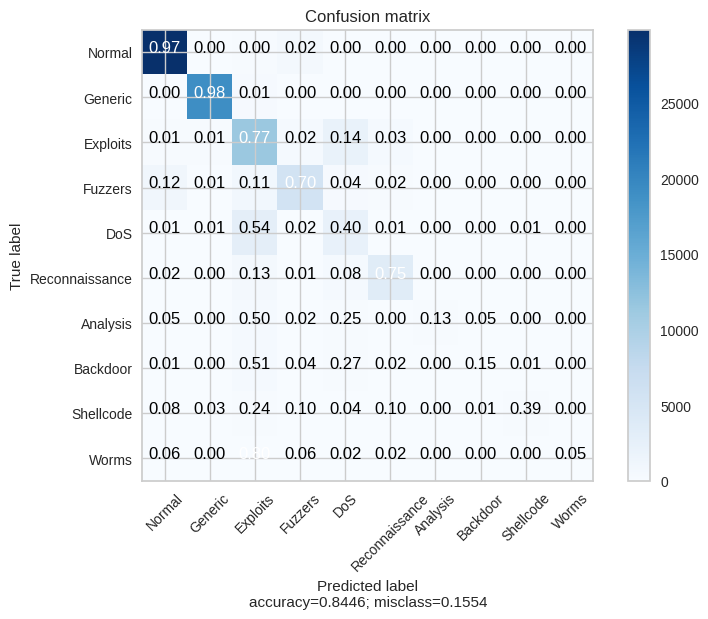

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod6,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['6']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod6,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.7555054278721189


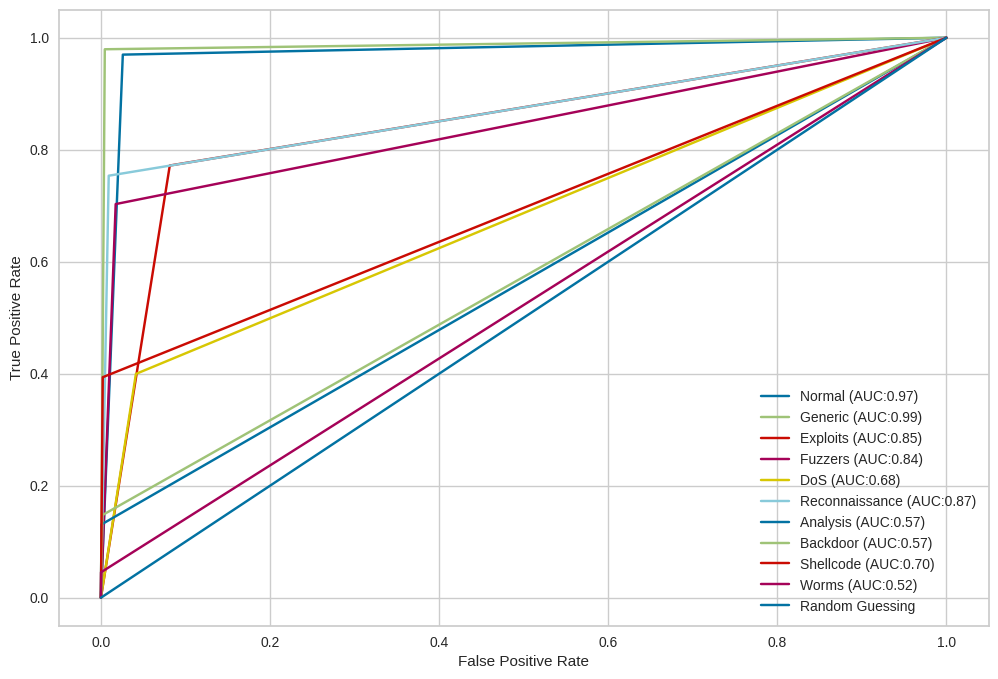

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Accuracies plots

In [ ]:
import plotly.express as px
levels = list(res_log.keys())
accuracies = list(res_log.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the logistic regression')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_rf_b.keys())
accuracies = list(res_rf_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_xgb_b.keys())
accuracies = list(res_xgb_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_nn_b.keys())
accuracies = list(res_nn_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_tree.keys())
accuracies = list(res_tree.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the decision tree')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_rf_m.keys())
accuracies = list(res_rf_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_xgb_m.keys())
accuracies = list(res_xgb_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_nn_m.keys())
accuracies = list(res_nn_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()